## Project: Open Food database

## A. An overview of the dataset

##### __1.Importing data__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from pandas import Series, DataFrame
import warnings
import re
from matplotlib.colors import LogNorm
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

In [2]:
ofr_data = pd.read_pickle('data_385k.pkl', compression='zip')

##### __2.Number of rows and columns__

In [3]:
print("Number of rows and columns")
print('Rows: {}'.format(ofr_data.shape[0]) + ' \nColumns: {}'.format(ofr_data.shape[1]))

Number of rows and columns
Rows: 385384 
Columns: 99


##### __3.Entries from the DataFrame__

In [4]:
ofr_data.head()

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                0.0  8001772000030                  NaN          NaN   
1                0.0  7610809001066                  NaN          NaN   
2                0.0  8002530159021                  NaN          NaN   
3                0.0  3033715065788                  NaN          NaN   
4                0.0  7610848492740                  NaN          NaN   

   carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
0                      75.00                      37.50                  g   
1                       1.50                       1.13                  g   
2                      52.68                        NaN                  g   
3                      70.40                      11.97                  g   
4                      37.00                       7.40                  g   

   cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  \
0                      NaN              NaN                    NaN   
1                      NaN              NaN                    NaN   
2                      NaN              NaN                    NaN   
3                      NaN              NaN                    NaN   
4                      NaN              NaN                    NaN   

  copper_cu_unit country                created_at  energy_kcal_per_hundred  \
0            NaN      CH  2016-06-01T11:42:22.908Z                    359.0   
1            NaN      CH  2016-06-01T11:42:25.111Z                    242.0   
2            NaN      CH  2016-06-01T11:42:25.900Z                    325.0   
3            NaN      CH  2016-06-01T11:42:26.184Z                    402.0   
4            NaN      CH  2016-06-01T11:42:26.350Z                    591.0   

   energy_kcal_per_portion energy_kcal_unit  energy_per_hundred  \
0                    179.0             kCal              1500.0   
1                    181.0             kCal              1010.0   
2                      NaN             kCal              1358.3   
3                     68.0             kCal              1679.0   
4                    118.0             kCal              2470.0   

   energy_per_portion energy_unit  fat_per_hundred  fat_per_portion fat_unit  \
0               150.0          kJ             0.42             0.21        g   
1               758.0          kJ            18.00            13.50        g   
2                 NaN          kJ            12.08              NaN        g   
3               285.0          kJ             7.90             1.34        g   
4               494.0          kJ            44.00             8.80        g   

   fatty_acids_total_saturated_per_hundred fatty_acids_total_saturated_unit  \
0                                      NaN                              NaN   
1                                      NaN                              NaN   
2                                      NaN                              NaN   
3                                      NaN                              NaN   
4                                      NaN                              NaN   

   fatty_acids_total_trans_per_hundred fatty_acids_total_trans_unit  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_insoluble_per_hundred fiber_insoluble_unit  fiber_per_hundred  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                0.0   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                9.1   
4                          NaN             

##### __4.1.Check the data type for each column__

In [5]:
ofr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

##### __4.2.Creating separate lists to hold the names of columns of the same data type__

In [6]:
pd.value_counts(ofr_data.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [7]:
list_object = ofr_data.select_dtypes(include=['object']).columns.to_list()
print (list_object)

['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'copper_cu_unit', 'country', 'created_at', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit', 'folic_acid_unit', 'hundred_unit', 'ingredients_en', 'iron_unit', 'magnesium_unit', 'manganese_mn_unit', 'monounsaturated_fatty_acids_unit', 'phosphorus_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit', 'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_units_unit', 'z

In [8]:
list_float = ofr_data.select_dtypes(include=['float64']).columns.to_list()
print (list_float)

['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion', 'sugars_added_per_hundred', 'sugars_per

In [9]:
list_int = ofr_data.select_dtypes(include=['int64']).columns.to_list()
print (list_int)

['id']


## B. Preliminary Exploratory Data Analysis

##### __1.Duplicated products in the data__

In [10]:
ofr_data.duplicated().sum()

10500

In [11]:
ofr_data.loc[ofr_data.duplicated(), :]

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
374884                0.0  7613404363317                  NaN          NaN   
374885                0.0  7613269343509                  NaN          NaN   
374886                0.0  2110012004502                  NaN          NaN   
374887                0.0  2159171001007                  NaN          NaN   
374888                0.0  7624841230186                  NaN          NaN   
...                   ...            ...                  ...          ...   
385379                0.0  7640145040283                  NaN          NaN   
385380                0.0  7640147023628                850.0           mg   
385381                0.0  3046920021593                  NaN          NaN   
385382                0.0  4044889004335                  NaN          NaN   
385383                0.0  7613379866622                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
374884                       17.0                      60.00   
374885                        1.0                       1.80   
374886                        NaN                        NaN   
374887                        NaN                        NaN   
374888                        NaN                        NaN   
...                           ...                        ...   
385379                        NaN                        NaN   
385380                       48.6                       9.72   
385381                       22.0                        NaN   
385382                        NaN                        NaN   
385383                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
374884                  g                      NaN              NaN   
374885                  g                      NaN              NaN   
374886                NaN                      NaN              NaN   
374887                NaN                      NaN              NaN   
374888                NaN                      NaN              NaN   
...                   ...                      ...              ...   
385379                NaN                      NaN              NaN   
385380                  g                      NaN              NaN   
385381                  g                      NaN              NaN   
385382                NaN                      NaN              NaN   
385383                NaN                      NaN              NaN   

        copper_cu_per_hundred copper_cu_unit country  \
374884                    NaN            NaN      CH   
374885                    NaN            NaN      CH   
374886                    NaN            NaN      CH   
374887                    NaN            NaN      CH   
374888                    NaN            NaN      CH   
...                       ...            ...     ...   
385379                    NaN            NaN      CH   
385380                    NaN            NaN      CH   
385381                    NaN            NaN      CH   
385382                    NaN            NaN      CH   
385383                    NaN            NaN      CH   

                      created_at  energy_kcal_per_hundred  \
374884  2021-09-28T08:11:59.797Z                    165.0   
374885  2021-09-28T08:16:22.906Z                     13.0   
374886  2021-09-28T08:20:18.546Z                      NaN   
374887  2021-09-28T08:21:26.832Z                      NaN   
374888  2021-09-28T08:22:01.102Z                      NaN   
...                          ...                      ...   
385379  2021-10-04T14:08:42.215Z                      NaN   
385380  2021-10-04T14:12:06.476Z                    285.0   
385381  2021-10-04T14:22:10.685Z                    584.0   
385382  2021-10-04T14:27:36.157Z                      NaN   
385383  2021-10-04T16:10:49.085Z                      NaN   

        energy_kcal_per_portion energy_kcal

In [12]:
ofr_data.drop_duplicates(inplace=True)
ofr_data.drop_duplicates(["barcode"], inplace=True)
ofr_data.drop_duplicates(["id"],inplace=True)
print("Number of rows and columns after removing duplicates")
print('Rows: {}'.format(ofr_data.shape[0]) + ' \nColumns: {}'.format(ofr_data.shape[1]))

Number of rows and columns after removing duplicates
Rows: 374446 
Columns: 99


##### __2.Proportion of missing values in the data__

In [13]:
ofr_data.isnull().sum().sum()

22372156

In [14]:
ofr_data.isnull().sum().sort_values()

alcohol_by_volume                                       0
portion_unit                                            0
portion_quantity                                        0
unit                                                    0
id                                                      0
hundred_unit                                            0
updated_at                                              0
created_at                                              0
country                                                 0
quantity                                                0
barcode                                                 0
protein_unit                                        23846
protein_per_hundred                                 24160
carbohydrates_unit                                  25824
carbohydrates_per_hundred                           26096
fat_unit                                            29059
fat_per_hundred                                     29387
product_name_e

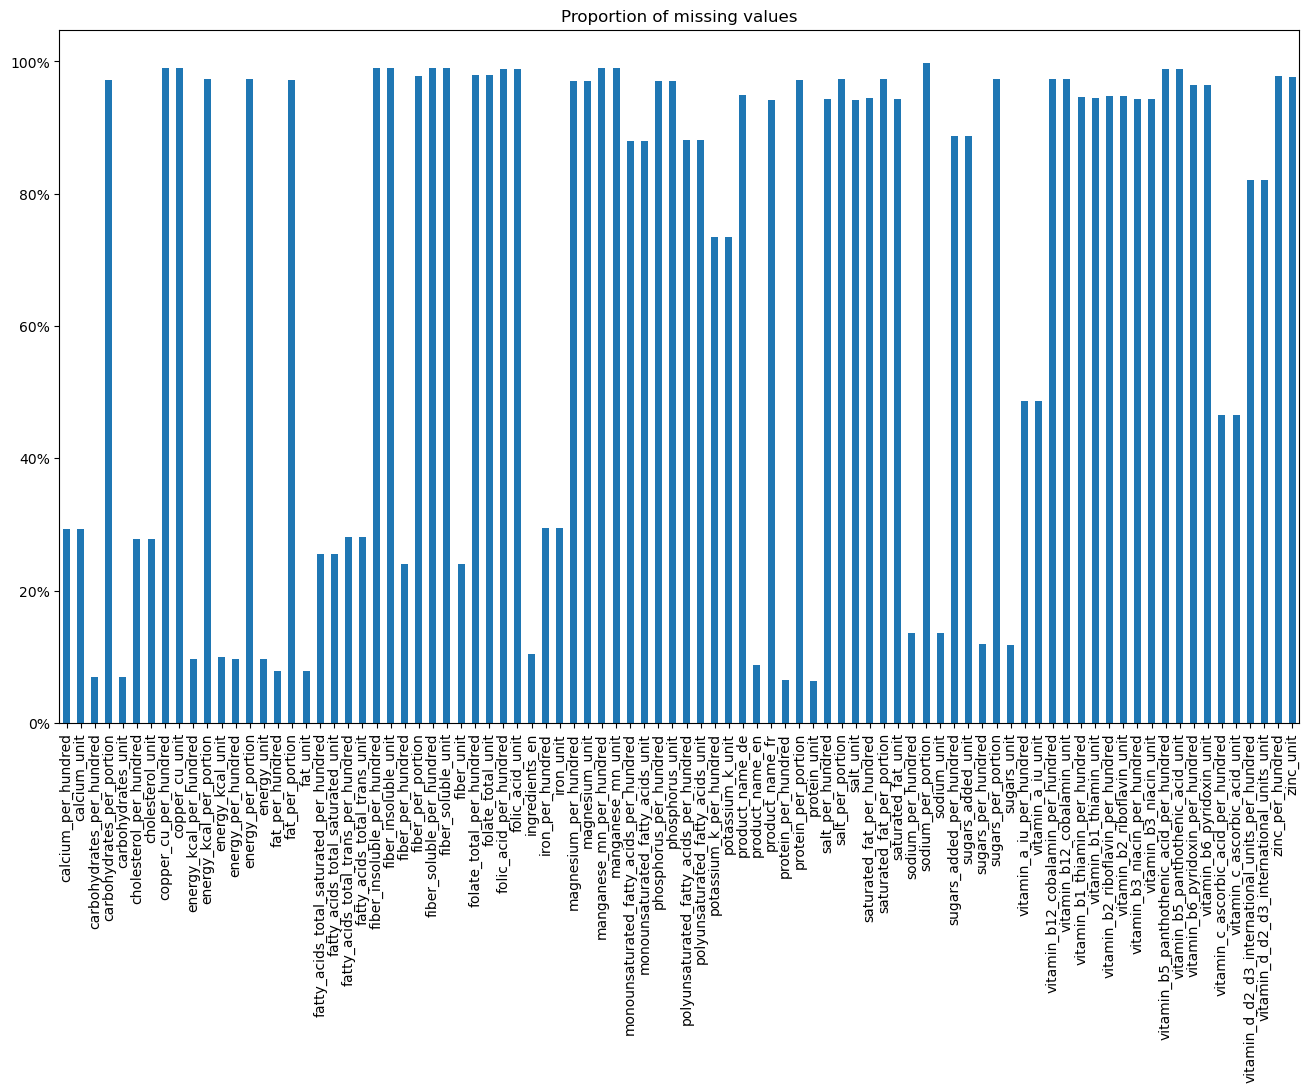

In [15]:
data_missing = ofr_data.isna().sum()[ofr_data.isna().sum()>0]
proportion = data_missing * 100 / len(ofr_data)
proportion.plot(kind='bar', figsize=(16, 9))
plt.title('Proportion of missing values')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

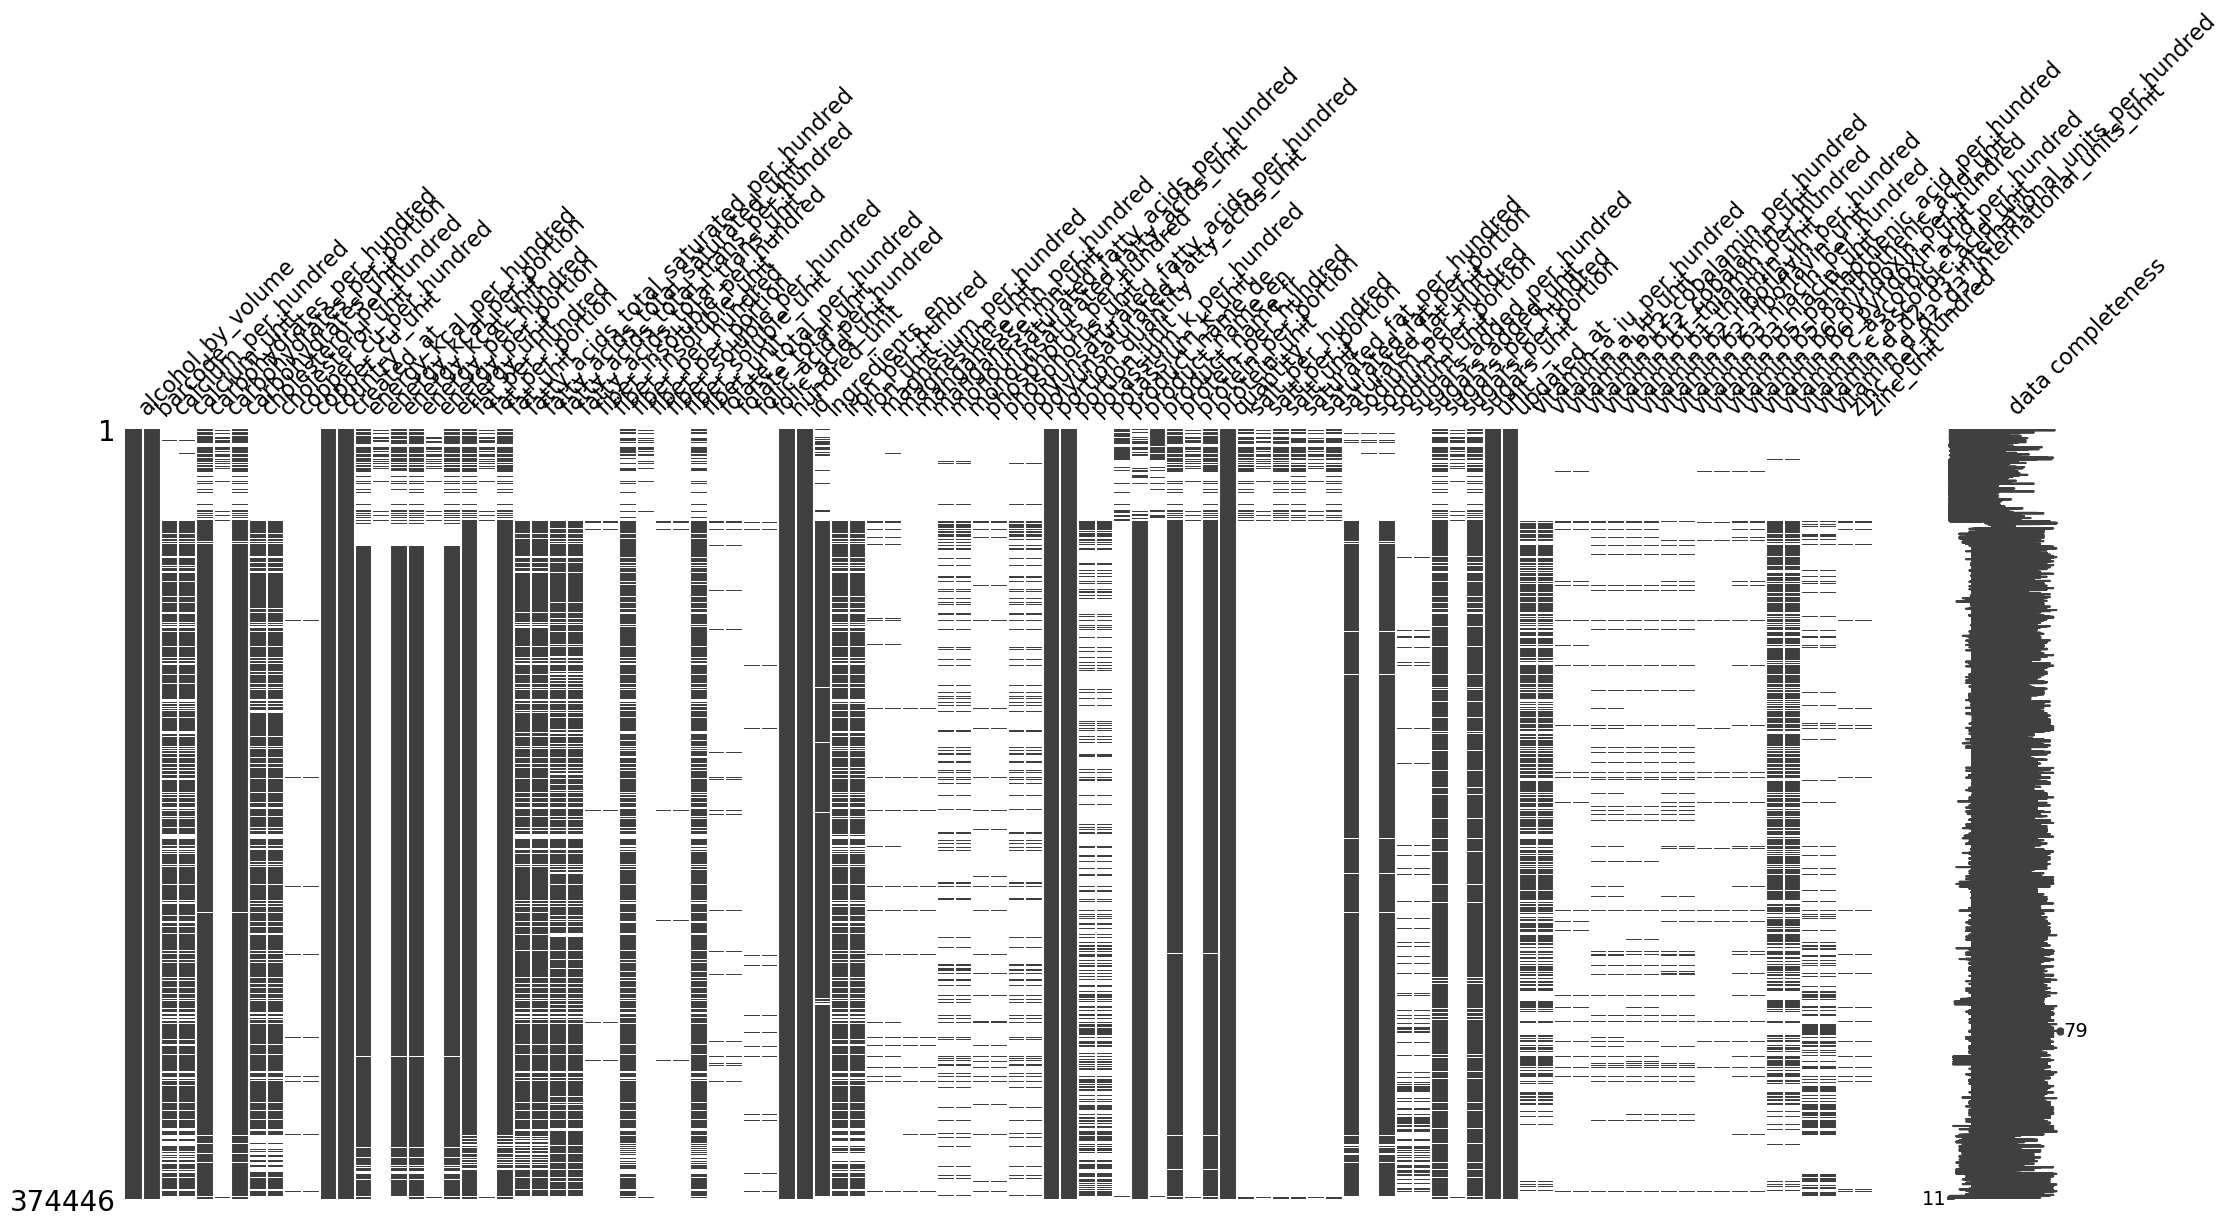

In [16]:
msno.matrix(ofr_data, labels=True)
plt.show()

##### __3.Addressing missing values__

Considering we have product names in three different languages, we'll create a new column that will primarily have English product names, then fill in the missing product name values with English names with German, then repeat the same with French product names.

First, we will put product names (product_name_en, product_name_fr, product_name_de) under "product_name"

Let's check how many missing values are in each product_name column for different langugages

In [17]:
ofr_data[["product_name_en","product_name_fr","product_name_de"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
dtype: int64

Now, we wil make new column called 'product_name' and fill it with eng names of products

In [18]:
ofr_data['product_name'] = ofr_data['product_name_de'].fillna(ofr_data['product_name_en'])

After we filled missing names with english or german names we will again check missing values.

In [19]:
ofr_data[["product_name_en","product_name_fr","product_name_de", "product_name"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
product_name        23450
dtype: int64

And now we will fill missing values with french names of products

In [20]:
ofr_data['product_name'] = ofr_data['product_name_fr'].fillna(ofr_data['product_name_en'])

Again we will check missing values of 'product_names'

In [21]:
ofr_data[["product_name_en","product_name_fr","product_name_de", "product_name"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
product_name        21303
dtype: int64

Now we will drop columns with product names on different languages because we made new universal one called 'product_name'

In [22]:
ofr_data.drop(["product_name_fr", "product_name_en", "product_name_de"], axis=1, inplace=True)

In [23]:
ofr_data.shape

(374446, 97)

Then we will clear the "product_name" column

In [24]:
ofr_data[ofr_data['product_name'].isnull()]

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
45                    0.0  7613034556080                  NaN          NaN   
71                    0.0  7611100088923                  NaN          NaN   
140                   0.0  7610057012661                  NaN          NaN   
141                   0.0  7610335003343                  NaN          NaN   
142                   0.0  7610057000170                  NaN          NaN   
...                   ...            ...                  ...          ...   
374874                0.0  3380380080432                  NaN          NaN   
374875                0.0  3390390006339                  NaN          NaN   
374876                0.0  2111009007858                  NaN          NaN   
374882                0.0  4044889004335                  NaN          NaN   
374883                0.0  7613379866622                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
45                           10.4                      26.00   
71                            3.5                       5.25   
140                          11.0                      27.50   
141                           NaN                        NaN   
142                          11.0                      27.50   
...                           ...                        ...   
374874                        NaN                        NaN   
374875                        NaN                        NaN   
374876                        NaN                        NaN   
374882                        NaN                        NaN   
374883                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
45                      g                      NaN              NaN   
71                      g                      NaN              NaN   
140                     g                      NaN              NaN   
141                   NaN                      NaN              NaN   
142                     g                      NaN              NaN   
...                   ...                      ...              ...   
374874                NaN                      NaN              NaN   
374875                NaN                      NaN              NaN   
374876                NaN                      NaN              NaN   
374882                NaN                      NaN              NaN   
374883                NaN                      NaN              NaN   

        copper_cu_per_hundred copper_cu_unit country  \
45                        NaN            NaN      CH   
71                        NaN            NaN      CH   
140                       NaN            NaN      CH   
141                       NaN            NaN      CH   
142                       NaN            NaN      CH   
...                       ...            ...     ...   
374874                    NaN            NaN      CH   
374875                    NaN            NaN      CH   
374876                    NaN            NaN      CH   
374882                    NaN            NaN      CH   
374883                    NaN            NaN      CH   

                      created_at  energy_kcal_per_hundred  \
45      2016-06-02T14:05:24.483Z                     41.0   
71      2016-06-03T10:34:09.343Z                     34.0   
140     2016-06-03T12:12:50.726Z                     45.0   
141     2016-06-03T12:12:51.290Z                      NaN   
142     2016-06-03T12:12:52.458Z                     45.0   
...                          ...                      ...   
374874  2021-10-04T07:19:13.346Z                      NaN   
374875  2021-10-04T07:20:41.305Z                      NaN   
374876  2021-10-04T11:02:10.954Z                      NaN   
374882  2021-10-04T14:27:36.157Z                      NaN   
374883  2021-10-04T16:10:49.085Z                      NaN   

        energy_kcal_per_portion energy_kcal

In [25]:
ofr_data[['product_name', "ingredients_en"]].isnull().sum()

product_name      21303
ingredients_en    38693
dtype: int64

We will drop names wiht missing values of product_names 

In [26]:
ofr_data = ofr_data.dropna(subset=["product_name"]).reset_index(drop=True)

In [27]:
ofr_data["ingredients_en"]

0         Superior quality durum wheat Pasta\r\n\r\nIngr...
1                      Bio Milk (Switzerland), kitchen salt
2                                      100%  coffee Arabica
3         Powdered chocolate 99% (sugar, cocoa), emulsif...
4         cocoa paste * (Honduras), raw cane sugar * (Pa...
                                ...                        
353138                                                  NaN
353139                                                  NaN
353140                                                  NaN
353141                                                  NaN
353142    cocoa mass, fat reduced cocoa, cocoa butter, d...
Name: ingredients_en, Length: 353143, dtype: object

Then, we will fill null values in ingredients_en column 

In [28]:
#ofr_data = ofr_data.dropna(subset=["ingredients_en"]).reset_index(drop=True)
#ofr_data = ofr_data.dropna(subset=["ingredients_en"])
#df['C'].fillna(df['C'].mode()[0], inplace=True)
ofr_data["ingredients_en"].fillna("None", inplace=True)

In [29]:
ofr_data["ingredients_en"].isnull().sum()

0

In [30]:
ofr_data["ingredients_en"].sample()

165697    CORN.
Name: ingredients_en, dtype: object

Also we will remove columns that we will not use in further data analysis

In [31]:
ofr_data = ofr_data.drop(columns=['barcode', 'id'])

We are also going to drop all NaN values from energy_per_hundred because we will use this data later on 

In [32]:
ofr_data[["energy_per_hundred"]].isnull().sum()

energy_per_hundred    19762
dtype: int64

In [33]:
ofr_data = ofr_data.dropna(subset=["energy_per_hundred"]).reset_index(drop=True)

In [34]:
ofr_data[['product_name', "ingredients_en"]].isnull().sum()

product_name      0
ingredients_en    0
dtype: int64

By doing so, we made it easier to find way around the data

##### __4.Exploring categorical variables in more detail__

Number of unique values in categorical variables 

In [35]:
categorical_features=[i for i in ofr_data.columns if ofr_data.dtypes[i]=='object']
categorical_features

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'country',
 'created_at',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'ingredients_en',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'unit',
 'updated_at',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit',
 'product_name

In [36]:
ofr_data.nunique().sum()

540533

In [37]:
ofr_df = pd.DataFrame(ofr_data)

In [38]:
print(f"Unique values present in country column are: {ofr_df['country'].unique()}")

Unique values present in country column are: ['CH' 'FR' 'IT' 'DE' 'UK' 'US']


In [39]:
print(f"Unique values present in unit column are: {ofr_df['unit'].unique()}")

Unique values present in unit column are: ['g' 'ml' 'cl' 'l' 'dl' 'kg']


Visualizations of categorical level in the variable counrty

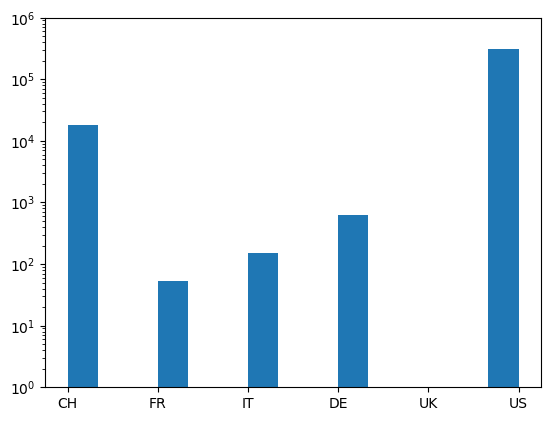

In [40]:
plt.hist(ofr_data["country"], bins=15)
plt.yscale("log")
plt.ylim(1, 1000000)
plt.show()

In [41]:
ofr_data.country.unique()

array(['CH', 'FR', 'IT', 'DE', 'UK', 'US'], dtype=object)

In [42]:
total_columns = ofr_data.columns

In [43]:
#ofr_data["country"].hist(figsize=(13,10))
#plt.show()

In [44]:
ofr_data.unit.unique()

array(['g', 'ml', 'cl', 'l', 'dl', 'kg'], dtype=object)

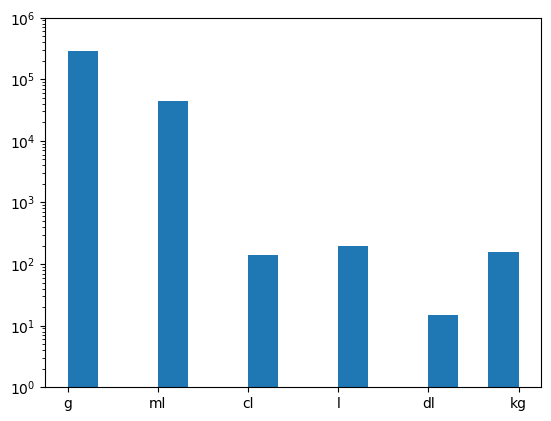

In [45]:
plt.hist(ofr_data["unit"], bins=15)
plt.yscale("log")
plt.ylim(1, 1000000)
plt.show()

In [46]:
#ofr_data["unit"].hist(figsize=(13,10))
#plt.show()

##### __5.Descriptive statistics and informative plots of the numerical variables__

Following table will show as statistical data for each column

In [47]:
ofr_data.describe()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count       333381.00000        253379.000000              330818.000000   
mean             0.00066           117.106852                  33.931349   
std              0.08997          2600.258277                  40.741496   
min              0.00000             0.000000                   0.000000   
25%              0.00000             0.000000                   6.670000   
50%              0.00000            36.000000                  23.530000   
75%              0.00000           103.000000                  60.000000   
max             40.00000        684000.000000                6400.000000   

       carbohydrates_per_portion  cholesterol_per_hundred  \
count                8224.000000            259294.000000   
mean                   19.021031                58.760424   
std                    17.413975              1937.761293   
min                     0.000000                 0.000000   
25%                     7.400000                 0.000000   
50%                    16.000000                 0.000000   
75%                    25.000000                25.000000   
max                   148.000000            250000.000000   

       copper_cu_per_hundred  energy_kcal_per_hundred  \
count            3468.000000            333301.000000   
mean                5.677382               272.108368   
std               280.069719               259.038031   
min                 0.000000                 0.000000   
25%                 0.210000                89.000000   
50%                 0.500000               267.000000   
75%                 1.070000               400.000000   
max             16483.520000             39600.000000   

       energy_kcal_per_portion  energy_per_hundred  energy_per_portion  \
count              7954.000000       333381.000000         7751.000000   
mean                158.308504         1138.085158          656.468918   
std                 132.724877         1083.261895          544.293371   
min                   0.000000            0.000000            0.000000   
25%                  81.000000          372.380000          339.000000   
50%                 128.000000         1117.130000          538.000000   
75%                 193.000000         1673.600000          802.500000   
max                1508.000000       165686.400000         5212.000000   

       fat_per_hundred  fat_per_portion  \
count    327083.000000      8249.000000   
mean         12.733675         6.300607   
std          19.743622         7.664747   
min           0.000000         0.000000   
25%           0.000000         0.800000   
50%           5.360000         4.600000   
75%          20.000000         9.000000   
max        3200.000000       212.000000   

       fatty_acids_total_saturated_per_hundred  \
count                            266858.000000   
mean                                  4.992642   
std                                   8.610172   
min                                   0.000000   
25%                                   0.000000   
50%                                   2.000000   
75%                                   7.140000   
max                                1000.000000   

       fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
count                        258048.000000                  1966.000000   
mean                              0.034400                     5.723296   
std                               1.307859                     5.226156   
min                               0.000000                     0.000000   
25%                               0.000000                     2.000000   
50%                               0.000000                     5.000000   
75%                               0.000000                     8.000000   
max                             615.380000                    43.000000   

       fiber_per_hundred  fiber_per_portion  fiber_soluble_per_hundred  \
co

In order to continue exploring the given data, we will use some informative plots.
In this plots we should see how are our variables distributed and see the relationship between them.

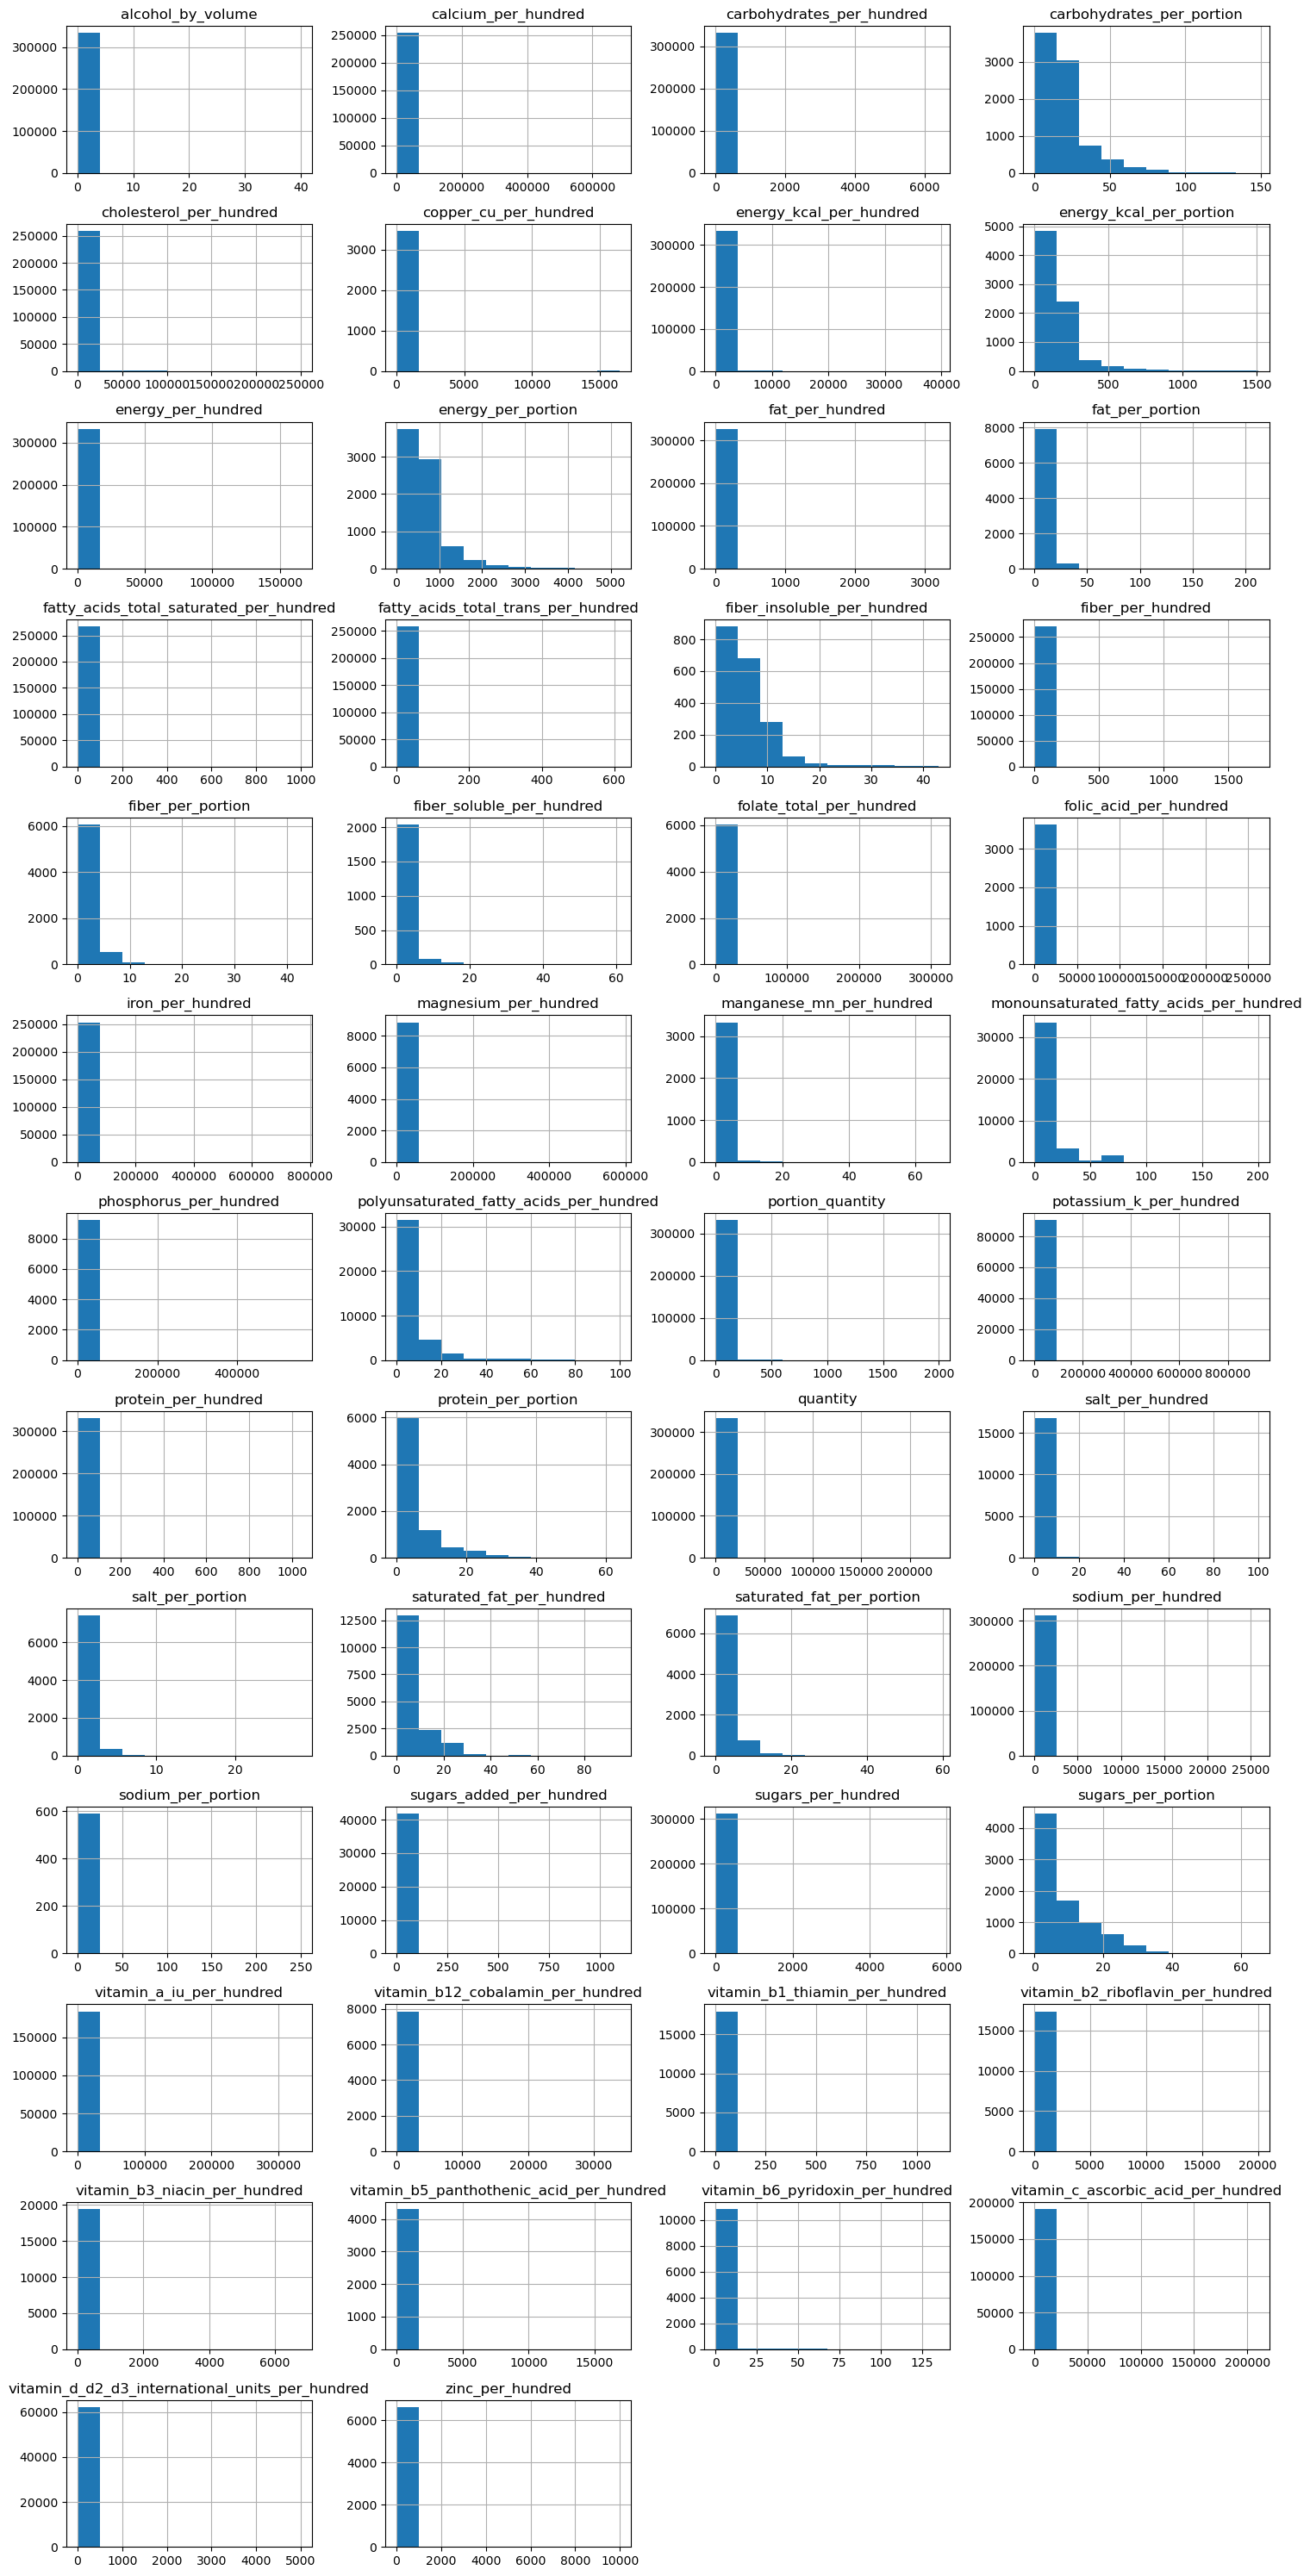

In [48]:
ofr_data.hist(figsize=(15,30),layout=(13,4))
plt.grid(False)
plt.tight_layout()
plt.show()

##### __6.1 Creating a new list to hold the columns with the per_hundred suffix in their names__

In [49]:
#ofr_data.loc[:, ofr_data.columns.str.endswith("per_hundred")]
per_hundred_df = ofr_data.filter(regex='per_hundred',axis=1)
per_hundred_df.head()

calcium_per_hundred  carbohydrates_per_hundred  cholesterol_per_hundred  \
0                  NaN                      75.00                      NaN   
1                  NaN                       1.50                      NaN   
2                  NaN                      52.68                      NaN   
3                  NaN                      70.40                      NaN   
4                  NaN                      37.00                      NaN   

   copper_cu_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
0                    NaN                    359.0              1500.0   
1                    NaN                    242.0              1010.0   
2                    NaN                    325.0              1358.3   
3                    NaN                    402.0              1679.0   
4                    NaN                    591.0              2470.0   

   fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
0             0.42                                      NaN   
1            18.00                                      NaN   
2            12.08                                      NaN   
3             7.90                                      NaN   
4            44.00                                      NaN   

   fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_per_hundred  fiber_soluble_per_hundred  folate_total_per_hundred  \
0                NaN                        NaN                       NaN   
1                0.0                        NaN                       NaN   
2                NaN                        NaN                       NaN   
3                9.1                        NaN                       NaN   
4                9.0                        NaN                       NaN   

   folic_acid_per_hundred  iron_per_hundred  magnesium_per_hundred  \
0                     NaN               NaN                    NaN   
1                     NaN               NaN                    NaN   
2                     NaN               NaN                    NaN   
3                     NaN               NaN                    NaN   
4                     NaN               NaN                    NaN   

   manganese_mn_per_hundred  monounsaturated_fatty_acids_per_hundred  \
0                       NaN                                      NaN   
1                       NaN                                      NaN   
2                       NaN                                      NaN   
3                       NaN                                      NaN   
4                       NaN                                      NaN   

   phosphorus_per_hundred  polyunsaturated_fatty_acids_per_hundred  \
0                     NaN                                      NaN   
1                     NaN                                      NaN   
2                     NaN                                      NaN   
3                     NaN                                      NaN   
4                     NaN                                      NaN   

   potassium_k_per_hundred  protein_per_hundred  salt_per_hundred  \
0                      NaN                11.00               NaN   
1                      NaN                19.00              0.50   
2                      NaN                19.05              0.25   
3                      NaN                 6.80               NaN   
4                      NaN                 8.00              0.06   

   saturated_fat_per_hundred  sodium_per_hundred  sugars_added_per_hundred  \
0                        NaN                 NaN          

In [50]:
list(per_hundred_df)

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin

In [51]:
per_hundred_df.describe()

calcium_per_hundred  carbohydrates_per_hundred  \
count        253379.000000              330818.000000   
mean            117.106852                  33.931349   
std            2600.258277                  40.741496   
min               0.000000                   0.000000   
25%               0.000000                   6.670000   
50%              36.000000                  23.530000   
75%             103.000000                  60.000000   
max          684000.000000                6400.000000   

       cholesterol_per_hundred  copper_cu_per_hundred  \
count            259294.000000            3468.000000   
mean                 58.760424               5.677382   
std                1937.761293             280.069719   
min                   0.000000               0.000000   
25%                   0.000000               0.210000   
50%                   0.000000               0.500000   
75%                  25.000000               1.070000   
max              250000.000000           16483.520000   

       energy_kcal_per_hundred  energy_per_hundred  fat_per_hundred  \
count            333301.000000       333381.000000    327083.000000   
mean                272.108368         1138.085158        12.733675   
std                 259.038031         1083.261895        19.743622   
min                   0.000000            0.000000         0.000000   
25%                  89.000000          372.380000         0.000000   
50%                 267.000000         1117.130000         5.360000   
75%                 400.000000         1673.600000        20.000000   
max               39600.000000       165686.400000      3200.000000   

       fatty_acids_total_saturated_per_hundred  \
count                            266858.000000   
mean                                  4.992642   
std                                   8.610172   
min                                   0.000000   
25%                                   0.000000   
50%                                   2.000000   
75%                                   7.140000   
max                                1000.000000   

       fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
count                        258048.000000                  1966.000000   
mean                              0.034400                     5.723296   
std                               1.307859                     5.226156   
min                               0.000000                     0.000000   
25%                               0.000000                     2.000000   
50%                               0.000000                     5.000000   
75%                               0.000000                     8.000000   
max                             615.380000                    43.000000   

       fiber_per_hundred  fiber_soluble_per_hundred  folate_total_per_hundred  \
count      270234.000000                2182.000000               6038.000000   
mean            2.932108                   3.277727                315.773766   
std             5.977751                   4.438571               6153.668610   
min             0.000000                   0.000000                  0.000000   
25%             0.000000                   2.000000                 42.000000   
50%             1.500000                   2.000000                108.000000   
75%             3.600000                   4.000000                205.000000   
max          1730.000000                  61.000000             311111.000000   

       folic_acid_per_hundred  iron_per_hundred  magnesium_per_hundred  \
count             3640.000000     253092.000000            8865.000000   
mean               612.712692          7.811802             239.710273   
std              10027.870720       1615.900855            6797.235342   
min                  0.000000          0.000000               0.000000   
25%                 67.000000          0.000000              20.000000   
50%                 99.000000         

##### Finding the unit of each column in the associated unit column

In [52]:
ofr_data.drop(['portion_unit','hundred_unit', 'vitamin_d_d2_d3_international_units_per_hundred'], axis=1, inplace=True)

In [53]:
unit = ofr_data.filter(regex='_unit',axis=1)
unit.head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit iron_unit magnesium_unit  \
0        NaN               NaN             NaN       NaN            NaN   
1          g               NaN             NaN       NaN            NaN   
2        NaN               NaN             NaN       NaN            NaN   
3          g               NaN             NaN       NaN            NaN   
4          g               NaN             NaN       NaN            NaN   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0               NaN                              NaN             NaN   
1               NaN                              NaN             NaN   
2               NaN                              NaN             NaN   
3               NaN                              NaN             NaN   
4               NaN                              NaN             NaN   

  polyunsaturated_fatty_acids_unit potassium_k_unit protein_unit salt_unit  \
0                              NaN              NaN            g       NaN   
1                              NaN              NaN            g         g   
2                              NaN              NaN            g         g   
3                              NaN              NaN            g       NaN   
4                              NaN              NaN            g         g   

  saturated_fat_unit sodium_unit sugars_added_unit sugars_unit  \
0                NaN         NaN               NaN         NaN   
1                  g         NaN               NaN           g   
2                  g         NaN               NaN           g   
3                  g         NaN               NaN           g   
4                  g         NaN               NaN           g   

  vitamin_a_iu_unit vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0               NaN                        NaN                     NaN   
1               NaN                        NaN                     NaN   
2               NaN                        NaN                     NaN   
3               NaN                        NaN                     NaN   
4               NaN                        NaN                     NaN   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                               NaN                       NaN   
1                            

In [54]:
unit.columns

Index(['calcium_unit', 'carbohydrates_unit', 'cholesterol_unit',
       'copper_cu_unit', 'energy_kcal_unit', 'energy_unit', 'fat_unit',
       'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit',
       'folate_total_unit', 'folic_acid_unit', 'iron_unit', 'magnesium_unit',
       'manganese_mn_unit', 'monounsaturated_fatty_acids_unit',
       'phosphorus_unit', 'polyunsaturated_fatty_acids_unit',
       'potassium_k_unit', 'protein_unit', 'salt_unit', 'saturated_fat_unit',
       'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'vitamin_a_iu_unit',
       'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit',
       'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit',
       'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit',
       'vitamin_c_ascorbic_acid_unit',
       'vitamin_d_d2_d3_international_units_unit', 'zinc_unit'],
      dtype='object')

In [55]:
for i in unit:
    print(ofr_data[i].isnull().sum())

79994
2547
74084
329913
959
0
6279
66523
75333
331415
331199
63125
327343
329741
80281
324512
329995
294474
324155
294515
242782
1475
316399
316685
22261
291484
21007
148831
325501
315407
316010
313948
329077
322436
142508
271012
326757


As we can see the columns of units have a lot of nan values so we are going to fill that with unit that is supposed to be in that column

In [56]:
for i in unit:
    ofr_data[i].fillna(ofr_data[i].mode().iloc[0], inplace=True)  

In [57]:
for i in unit:
    print(ofr_data[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [58]:
unit.head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit iron_unit magnesium_unit  \
0        NaN               NaN             NaN       NaN            NaN   
1          g               NaN             NaN       NaN            NaN   
2        NaN               NaN             NaN       NaN            NaN   
3          g               NaN             NaN       NaN            NaN   
4          g               NaN             NaN       NaN            NaN   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0               NaN                              NaN             NaN   
1               NaN                              NaN             NaN   
2               NaN                              NaN             NaN   
3               NaN                              NaN             NaN   
4               NaN                              NaN             NaN   

  polyunsaturated_fatty_acids_unit potassium_k_unit protein_unit salt_unit  \
0                              NaN              NaN            g       NaN   
1                              NaN              NaN            g         g   
2                              NaN              NaN            g         g   
3                              NaN              NaN            g       NaN   
4                              NaN              NaN            g         g   

  saturated_fat_unit sodium_unit sugars_added_unit sugars_unit  \
0                NaN         NaN               NaN         NaN   
1                  g         NaN               NaN           g   
2                  g         NaN               NaN           g   
3                  g         NaN               NaN           g   
4                  g         NaN               NaN           g   

  vitamin_a_iu_unit vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0               NaN                        NaN                     NaN   
1               NaN                        NaN                     NaN   
2               NaN                        NaN                     NaN   
3               NaN                        NaN                     NaN   
4               NaN                        NaN                     NaN   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                               NaN                       NaN   
1                            

In [59]:
for i in unit:
    print(unit[i].isnull().sum())

79994
2547
74084
329913
959
0
6279
66523
75333
331415
331199
63125
327343
329741
80281
324512
329995
294474
324155
294515
242782
1475
316399
316685
22261
291484
21007
148831
325501
315407
316010
313948
329077
322436
142508
271012
326757


In [60]:
for i in unit:
    unit[i].fillna(unit[i].mode().iloc[0], inplace=True)  

In [61]:
unit.isnull().sum().sum()

0

In [62]:
unit.head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0           mg                  g               mg             mg   
1           mg                  g               mg             mg   
2           mg                  g               mg             mg   
3           mg                  g               mg             mg   
4           mg                  g               mg             mg   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                                g   
1             kCal          kJ        g                                g   
2             kCal          kJ        g                                g   
3             kCal          kJ        g                                g   
4             kCal          kJ        g                                g   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                            g                    g                  g   
1                            g                    g                  g   
2                            g                    g                  g   
3                            g                    g                  g   
4                            g                    g                  g   

  fiber_unit folate_total_unit folic_acid_unit iron_unit magnesium_unit  \
0          g                µg              µg        mg             mg   
1          g                µg              µg        mg             mg   
2          g                µg              µg        mg             mg   
3          g                µg              µg        mg             mg   
4          g                µg              µg        mg             mg   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0                mg                                g              mg   
1                mg                                g              mg   
2                mg                                g              mg   
3                mg                                g              mg   
4                mg                                g              mg   

  polyunsaturated_fatty_acids_unit potassium_k_unit protein_unit salt_unit  \
0                                g               mg            g         g   
1                                g               mg            g         g   
2                                g               mg            g         g   
3                                g               mg            g         g   
4                                g               mg            g         g   

  saturated_fat_unit sodium_unit sugars_added_unit sugars_unit  \
0                  g           g                 g           g   
1                  g           g                 g           g   
2                  g           g                 g           g   
3                  g           g                 g           g   
4                  g           g                 g           g   

  vitamin_a_iu_unit vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0                IU                         µg                      mg   
1                IU                         µg                      mg   
2                IU                         µg                      mg   
3                IU                         µg                      mg   
4                IU                         µg                      mg   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                         mg                     mg   
1                         mg                     mg   
2                         mg                     mg   
3                         mg                     mg   
4                         mg                     mg   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                                mg                        mg   
1                            

##### mg unit

When column’s unit is mg, then the values should range between 0 and 10^5.
First we will fillter columns that contain mg as a unit.
Then we take per_hundrerd columns with mg units and then we are going to put limits. 

In [63]:
mg_unit = unit[unit == 'mg']
mg_unit = mg_unit[mg_unit.columns[~mg_unit.isnull().all()]]
mg_unit

calcium_unit cholesterol_unit copper_cu_unit iron_unit magnesium_unit  \
0                mg               mg             mg        mg             mg   
1                mg               mg             mg        mg             mg   
2                mg               mg             mg        mg             mg   
3                mg               mg             mg        mg             mg   
4                mg               mg             mg        mg             mg   
...             ...              ...            ...       ...            ...   
333376           mg               mg             mg        mg             mg   
333377           mg               mg             mg        mg             mg   
333378           mg               mg             mg        mg             mg   
333379           mg               mg             mg        mg             mg   
333380           mg               mg             mg        mg             mg   

       manganese_mn_unit phosphorus_unit potassium_k_unit  \
0                     mg              mg               mg   
1                     mg              mg               mg   
2                     mg              mg               mg   
3                     mg              mg               mg   
4                     mg              mg               mg   
...                  ...             ...              ...   
333376                mg              mg               mg   
333377                mg              mg               mg   
333378                mg              mg               mg   
333379                mg              mg               mg   
333380                mg              mg               mg   

       vitamin_b1_thiamin_unit vitamin_b2_riboflavin_unit  \
0                           mg                         mg   
1                           mg                         mg   
2                           mg                         mg   
3                           mg                         mg   
4                           mg                         mg   
...                        ...                        ...   
333376                      mg                         mg   
333377                      mg                         mg   
333378                      mg                         mg   
333379                      mg                         mg   
333380                      mg                         mg   

       vitamin_b3_niacin_unit vitamin_b5_panthothenic_acid_unit  \
0                          mg                                mg   
1                          mg                                mg   
2                          mg                                mg   
3                          mg                                mg   
4                          mg                                mg   
...                       ...                               ...   
333376                     mg                                mg   
333377                     mg                                mg   
333378                     mg                                mg   
333379                     mg                                mg   
333380                     mg                                mg   

       vitamin_b6_pyridoxin_unit vitamin_c_ascorbic_acid_unit zinc_unit  
0                             mg                           mg        mg  
1                             mg                           mg        mg  
2                             mg                           mg        mg  
3                             mg                           mg        mg  
4                             mg                           mg        mg  
...                          ...                          ...       ...  
333376                        mg                           mg        mg  
333377                        mg                           mg        mg  
333378                        mg                           mg        mg  
333379                        mg   

Now we will take part of the column names

In [64]:
for x in mg_unit.columns:
    #initializing string
    test_string = x
    #initializing substring
    spl_word = 'unit'
    #using regular expression
    result = re.split(spl_word, test_string)[0]
    #printing result
    print(result)

calcium_
cholesterol_
copper_cu_
iron_
magnesium_
manganese_mn_
phosphorus_
potassium_k_
vitamin_b1_thiamin_
vitamin_b2_riboflavin_
vitamin_b3_niacin_
vitamin_b5_panthothenic_acid_
vitamin_b6_pyridoxin_
vitamin_c_ascorbic_acid_
zinc_


In [65]:
mg_units_names = ["calcium_","cholesterol_","copper_cu_","iron_","magnesium_","manganese_mn_","phosphorus_","potassium_k_","vitamin_b1_thiamin_","vitamin_b2_riboflavin_","vitamin_b3_niacin_","vitamin_b5_panthothenic_acid_","vitamin_b6_pyridoxin_","vitamin_c_ascorbic_acid_","zinc_"]
mg_units_names

['calcium_',
 'cholesterol_',
 'copper_cu_',
 'iron_',
 'magnesium_',
 'manganese_mn_',
 'phosphorus_',
 'potassium_k_',
 'vitamin_b1_thiamin_',
 'vitamin_b2_riboflavin_',
 'vitamin_b3_niacin_',
 'vitamin_b5_panthothenic_acid_',
 'vitamin_b6_pyridoxin_',
 'vitamin_c_ascorbic_acid_',
 'zinc_']

In [66]:
calcium_per_hundred_df = ofr_data.loc[(ofr_data["calcium_per_hundred"] > 10^5)]
calcium_per_hundred_df

alcohol_by_volume  calcium_per_hundred calcium_unit  \
10                    0.0                124.0           mg   
17                    0.0                121.0           mg   
70                    0.0                630.0           mg   
178                   0.0                260.0           mg   
179                   0.0                350.0           mg   
...                   ...                  ...          ...   
333294                0.0                120.0           mg   
333315                0.0                120.0           mg   
333321                0.0                860.0           mg   
333342                0.0                120.0           mg   
333379                0.0                850.0           mg   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
10                           41.8                      17.40   
17                           38.3                      19.15   
70                           73.5                      21.00   
178                           4.0                        NaN   
179                           0.8                       0.00   
...                           ...                        ...   
333294                       10.5                        NaN   
333315                        5.0                        NaN   
333321                        0.1                        NaN   
333342                       13.8                        NaN   
333379                       48.6                       9.72   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
10                      g                      NaN               mg   
17                      g                      NaN               mg   
70                      g                      NaN               mg   
178                     g                      NaN               mg   
179                     g                      NaN               mg   
...                   ...                      ...              ...   
333294                  g                      NaN               mg   
333315                  g                      NaN               mg   
333321                  g                      NaN               mg   
333342                  g                      NaN               mg   
333379                  g                      NaN               mg   

        copper_cu_per_hundred copper_cu_unit country  \
10                        NaN             mg      CH   
17                        NaN             mg      CH   
70                        NaN             mg      CH   
178                       NaN             mg      CH   
179                       NaN             mg      CH   
...                       ...            ...     ...   
333294                    NaN             mg      CH   
333315                    NaN             mg      CH   
333321                    NaN             mg      CH   
333342                    NaN             mg      CH   
333379                    NaN             mg      CH   

                      created_at  energy_kcal_per_hundred  \
10      2016-06-02T14:02:40.575Z                    417.0   
17      2016-06-02T14:03:22.967Z                    476.8   
70      2016-06-03T12:09:09.651Z                    371.0   
178     2016-06-03T12:17:38.424Z                    269.0   
179     2016-06-03T12:17:59.672Z                    330.0   
...                          ...                      ...   
333294  2021-09-02T18:14:00.378Z                     76.0   
333315  2021-09-14T14:02:16.435Z                     67.0   
333321  2021-09-16T19:58:41.193Z                    352.0   
333342  2021-09-22T15:14:06.862Z                     87.0   
333379  2021-10-04T14:12:06.476Z                    285.0   

        energy_kcal_per_portion energy_kcal_unit  energy_per_hundred  \
10                        175.0             kCal              1741.0   
17                        238.4             kCal              1994.8   
70     

Here we are looking for names of columns with same part.
When we find those columns we are going to drop values that do not belong to the default interval for units.

In [67]:
for x in mg_units_names:
    per_hundred_df_mg = per_hundred_df.filter(like=x)
    for y in per_hundred_df_mg:
        ofr_data.drop(ofr_data[ofr_data[y] > 10^5].index, inplace = True)
        ofr_data.drop(ofr_data[ofr_data[y] < 0].index, inplace = True)

In [68]:
calcium_per_hundred_df = ofr_data.loc[(ofr_data["calcium_per_hundred"] > 10^5)]
calcium_per_hundred_df

Empty DataFrame
Columns: [alcohol_by_volume, calcium_per_hundred, calcium_unit, carbohydrates_per_hundred, carbohydrates_per_portion, carbohydrates_unit, cholesterol_per_hundred, cholesterol_unit, copper_cu_per_hundred, copper_cu_unit, country, created_at, energy_kcal_per_hundred, energy_kcal_per_portion, energy_kcal_unit, energy_per_hundred, energy_per_portion, energy_unit, fat_per_hundred, fat_per_portion, fat_unit, fatty_acids_total_saturated_per_hundred, fatty_acids_total_saturated_unit, fatty_acids_total_trans_per_hundred, fatty_acids_total_trans_unit, fiber_insoluble_per_hundred, fiber_insoluble_unit, fiber_per_hundred, fiber_per_portion, fiber_soluble_per_hundred, fiber_soluble_unit, fiber_unit, folate_total_per_hundred, folate_total_unit, folic_acid_per_hundred, folic_acid_unit, ingredients_en, iron_per_hundred, iron_unit, magnesium_per_hundred, magnesium_unit, manganese_mn_per_hundred, manganese_mn_unit, monounsaturated_fatty_acids_per_hundred, monounsaturated_fatty_acids_unit, phosphorus_per_hundred, phosphorus_unit, polyunsaturated_fatty_acids_per_hundred, polyunsaturated_fatty_acids_unit, portion_quantity, potassium_k_per_hundred, potassium_k_unit, protein_per_hundred, protein_per_portion, protein_unit, quantity, salt_per_hundred, salt_per_portion, salt_unit, saturated_fat_per_hundred, saturated_fat_per_portion, saturated_fat_unit, sodium_per_hundred, sodium_per_portion, sodium_unit, sugars_added_per_hundred, sugars_added_unit, sugars_per_hundred, sugars_per_portion, sugars_unit, unit, updated_at, vitamin_a_iu_per_hundred, vitamin_a_iu_unit, vitamin_b12_cobalamin_per_hundred, vitamin_b12_cobalamin_unit, vitamin_b1_thiamin_per_hundred, vitamin_b1_thiamin_unit, vitamin_b2_riboflavin_per_hundred, vitamin_b2_riboflavin_unit, vitamin_b3_niacin_per_hundred, vitamin_b3_niacin_unit, vitamin_b5_panthothenic_acid_per_hundred, vitamin_b5_panthothenic_acid_unit, vitamin_b6_pyridoxin_per_hundred, vitamin_b6_pyridoxin_unit, vitamin_c_ascorbic_acid_per_hundred, vitamin_c_ascorbic_acid_unit, vitamin_d_d2_d3_international_units_unit, zinc_per_hundred, zinc_unit, product_name]
Index: []

##### kJ unit

In [69]:
kJ_unit = unit[unit == 'kJ']
kJ_unit = kJ_unit[kJ_unit.columns[~kJ_unit.isnull().all()]]
kJ_unit

energy_unit
0               kJ
1               kJ
2               kJ
3               kJ
4               kJ
...            ...
333376          kJ
333377          kJ
333378          kJ
333379          kJ
333380          kJ

[333381 rows x 1 columns]

In [70]:
energy_per_hundred_df = ofr_data.loc[(ofr_data["energy_per_hundred"] > 3700)]
energy_per_hundred_df

alcohol_by_volume  calcium_per_hundred calcium_unit  \
19626                 0.0                  NaN           mg   
20641                 0.0                  0.0           mg   
21107                 0.0                  NaN           mg   
21419                 0.0                  0.0           mg   
22308                 0.0                  0.0           mg   
...                   ...                  ...          ...   
330567                0.0                  0.0           mg   
331029                0.0                  NaN           mg   
331030                0.0                  NaN           mg   
332105                0.0                  NaN           mg   
332912                0.0                  NaN           mg   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
19626                         0.0                        NaN   
20641                         0.0                        NaN   
21107                         0.0                        NaN   
21419                         0.0                        NaN   
22308                         0.0                        NaN   
...                           ...                        ...   
330567                        0.0                        NaN   
331029                        0.0                        NaN   
331030                        0.0                        NaN   
332105                        0.0                        NaN   
332912                       57.0                       34.0   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
19626                   g                      0.0               mg   
20641                   g                      0.0               mg   
21107                   g                      0.0               mg   
21419                   g                      0.0               mg   
22308                   g                      0.0               mg   
...                   ...                      ...              ...   
330567                  g                      0.0               mg   
331029                  g                      NaN               mg   
331030                  g                      NaN               mg   
332105                  g                      0.0               mg   
332912                  g                      NaN               mg   

        copper_cu_per_hundred copper_cu_unit country  \
19626                     NaN             mg      US   
20641                     NaN             mg      US   
21107                     NaN             mg      US   
21419                     NaN             mg      US   
22308                     NaN             mg      US   
...                       ...            ...     ...   
330567                    NaN             mg      US   
331029                    NaN             mg      US   
331030                    NaN             mg      US   
332105                    NaN             mg      US   
332912                    NaN             mg      CH   

                      created_at  energy_kcal_per_hundred  \
19626   2021-04-26T10:19:10.728Z                    917.0   
20641   2021-04-26T10:19:12.151Z                    917.0   
21107   2021-04-26T10:19:12.993Z                    929.0   
21419   2021-04-26T10:19:12.993Z                    889.0   
22308   2021-04-26T10:19:13.968Z                    929.0   
...                          ...                      ...   
330567  2021-04-26T10:23:00.932Z                    900.0   
331029  2021-04-26T10:23:00.932Z                    929.0   
331030  2021-04-26T10:23:00.932Z                    929.0   
332105  2021-04-26T10:23:02.515Z                   1111.0   
332912  2021-06-02T10:47:31.881Z                    487.0   

        energy_kcal_per_portion energy_kcal_unit  energy_per_hundred  \
19626                       NaN             kCal             3836.73   
20641                       NaN             kCal             3836.73   
21107  

In [71]:
ofr_data.drop(ofr_data[ofr_data['energy_per_hundred'] > 3700].index, inplace = True)
ofr_data.drop(ofr_data[ofr_data['energy_per_hundred'] < 0].index, inplace = True)

##### µg unit

In [72]:
µg_unit = unit[unit == 'µg']
µg_unit = µg_unit[µg_unit.columns[~µg_unit.isnull().all()]]
µg_unit 

folate_total_unit folic_acid_unit vitamin_b12_cobalamin_unit
0                     µg              µg                         µg
1                     µg              µg                         µg
2                     µg              µg                         µg
3                     µg              µg                         µg
4                     µg              µg                         µg
...                  ...             ...                        ...
333376                µg              µg                         µg
333377                µg              µg                         µg
333378                µg              µg                         µg
333379                µg              µg                         µg
333380                µg              µg                         µg

[333381 rows x 3 columns]

In [73]:
for x in µg_unit.columns:
    #initializing string
    test_string = x
    #initializing substring
    spl_word = 'unit'
    #using regular expression
    result = re.split(spl_word, test_string)[0]
    
µg_units_names = ["folate_total_","folic_acid_","vitamin_b12_cobalamin_"]

In [74]:
for x in µg_units_names:
    per_hundred_df_µg = per_hundred_df.filter(like=x)
    for y in per_hundred_df_µg:
        ofr_data.drop(ofr_data[ofr_data[y] > 10^8].index, inplace = True)
        ofr_data.drop(ofr_data[ofr_data[y] < 0].index, inplace = True)

##### g unit

When unit of column is g, values should range between 0 and 100

In [75]:
g_unit = unit[unit == 'g']
g_unit = g_unit[g_unit.columns[~g_unit.isnull().all()]]
g_unit 

carbohydrates_unit fat_unit fatty_acids_total_saturated_unit  \
0                       g        g                                g   
1                       g        g                                g   
2                       g        g                                g   
3                       g        g                                g   
4                       g        g                                g   
...                   ...      ...                              ...   
333376                  g        g                                g   
333377                  g        g                                g   
333378                  g        g                                g   
333379                  g        g                                g   
333380                  g        g                                g   

       fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                                 g                    g                  g   
1                                 g                    g                  g   
2                                 g                    g                  g   
3                                 g                    g                  g   
4                                 g                    g                  g   
...                             ...                  ...                ...   
333376                            g                    g                  g   
333377                            g                    g                  g   
333378                            g                    g                  g   
333379                            g                    g                  g   
333380                            g                    g                  g   

       fiber_unit monounsaturated_fatty_acids_unit  \
0               g                                g   
1               g                                g   
2               g                                g   
3               g                                g   
4               g                                g   
...           ...                              ...   
333376          g                                g   
333377          g                                g   
333378          g                                g   
333379          g                                g   
333380          g                                g   

       polyunsaturated_fatty_acids_unit protein_unit salt_unit  \
0                                     g            g         g   
1                                     g            g         g   
2                                     g            g         g   
3                                     g            g         g   
4                                     g            g         g   
...                                 ...          ...       ...   
333376                                g            g         g   
333377                                g            g         g   
333378                                g            g         g   
333379                                g            g         g   
333380                                g            g         g   

       saturated_fat_unit sodium_unit sugars_added_unit sugars_unit  
0                       g           g                 g           g  
1                       g           g                 g           g  
2                       g           g                 g           g  
3                       g           g                 g           g  
4                       g           g                 g           g  
...                   ...         ...               ...         ...  
333376                  g           g                 g           g  
333377                  g           g                 g           g  
333378                  g           g                 g           g  
333379                  g           g                 g        

In [76]:
for x in g_unit.columns:
    #initializing string
    test_string = x
    #initializing substring
    spl_word = 'unit'
    #using regular expression
    result = re.split(spl_word, test_string)[0]
    #printing result
    print(result)

carbohydrates_
fat_
fatty_acids_total_saturated_
fatty_acids_total_trans_
fiber_insoluble_
fiber_soluble_
fiber_
monounsaturated_fatty_acids_
polyunsaturated_fatty_acids_
protein_
salt_
saturated_fat_
sodium_
sugars_added_
sugars_


In [77]:
g_units_names = ["carbohydrates_","fat_","fatty_acids_total_saturated_","fatty_acids_total_trans_","fiber_insoluble_","fiber_soluble_","fiber_","monounsaturated_fatty_acids_","polyunsaturated_fatty_acids_","protein_","salt_","saturated_fat_","sodium_","sugars_added_","sugars_"]

In [78]:
for x in g_units_names:
    per_hundred_df_g = per_hundred_df.filter(like=x)
    for y in per_hundred_df_g:
        ofr_data.drop(ofr_data[ofr_data[y] > 100].index, inplace = True)
        ofr_data.drop(ofr_data[ofr_data[y] < 0].index, inplace = True)

In [79]:
ofr_data.shape

(113735, 92)

In [80]:
ofr_data.describe()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count      113735.000000         49409.000000              112135.000000   
mean            0.001935             0.796281                  37.136912   
std             0.154029             2.826482                  33.265436   
min             0.000000             0.000000                   0.000000   
25%             0.000000             0.000000                   6.200000   
50%             0.000000             0.000000                  26.670000   
75%             0.000000             0.000000                  68.000000   
max            40.000000            15.000000                 100.000000   

       carbohydrates_per_portion  cholesterol_per_hundred  \
count                7858.000000             55856.000000   
mean                   19.101911                 0.485874   
std                    17.677609                 2.252072   
min                     0.000000                 0.000000   
25%                     7.147500                 0.000000   
50%                    16.000000                 0.000000   
75%                    25.000000                 0.000000   
max                   148.000000                15.000000   

       copper_cu_per_hundred  energy_kcal_per_hundred  \
count              31.000000            113658.000000   
mean                0.402581               246.887705   
std                 0.987468               207.209396   
min                 0.000000                 0.000000   
25%                 0.015000                48.000000   
50%                 0.050000               238.000000   
75%                 0.140000               388.000000   
max                 4.710000              3034.000000   

       energy_kcal_per_portion  energy_per_hundred  energy_per_portion  \
count              7614.000000       113735.000000         7407.000000   
mean                160.145343         1031.674102          664.361979   
std                 134.728409          863.125172          552.398316   
min                   0.000000            0.000000            0.000000   
25%                  81.000000          200.830000          340.000000   
50%                 129.000000          991.610000          540.000000   
75%                 196.000000         1623.390000          813.000000   
max                1508.000000         3700.000000         5212.000000   

       fat_per_hundred  fat_per_portion  \
count    110152.000000      7882.000000   
mean         10.070536         6.438899   
std          19.491539         7.778131   
min           0.000000         0.000000   
25%           0.000000         0.900000   
50%           0.000000         4.750000   
75%          13.270000         9.000000   
max         100.000000       212.000000   

       fatty_acids_total_saturated_per_hundred  \
count                             60425.000000   
mean                                  3.847535   
std                                   8.256850   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   5.000000   
max                                 100.000000   

       fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
count                         58177.000000                   223.000000   
mean                              0.050502                     6.542601   
std                               0.668524                     4.777644   
min                               0.000000                     0.000000   
25%                               0.000000                     5.000000   
50%                               0.000000                     5.000000   
75%                               0.000000                     6.000000   
max                              33.330000                    34.000000   

       fiber_per_hundred  fiber_per_portion  fiber_soluble_per_hundred  \
co

##### __7.Other inconsistencies in the data__

Sum of a product’s protein, fat, carbohydrates, salt, and fiber content should be equal or less then 100.
Meaning, that we can't have product which sum of macronutrients is bigger than 100.

In [81]:
ofr_data[['protein_per_hundred','fat_per_hundred','carbohydrates_per_hundred','salt_per_hundred','fiber_per_hundred']].describe()

protein_per_hundred  fat_per_hundred  carbohydrates_per_hundred  \
count        112704.000000    110152.000000              112135.000000   
mean              3.380469        10.070536                  37.136912   
std               5.990159        19.491539                  33.265436   
min               0.000000         0.000000                   0.000000   
25%               0.000000         0.000000                   6.200000   
50%               0.000000         0.000000                  26.670000   
75%               5.000000        13.270000                  68.000000   
max             100.000000       100.000000                 100.000000   

       salt_per_hundred  fiber_per_hundred  
count      16326.000000       68036.000000  
mean           0.997302           2.525998  
std            3.153303           4.503279  
min            0.000000           0.000000  
25%            0.050000           0.000000  
50%            0.270000           0.900000  
75%            1.200000           3.500000  
max           99.800000         100.000000

In [82]:
ofr_data['Sum'] = ofr_data['carbohydrates_per_hundred'] + ofr_data['fat_per_hundred'] + ofr_data['protein_per_hundred'] + ofr_data['salt_per_hundred']+ ofr_data['fiber_per_hundred']
ofr_data[["Sum","product_name"]].set_index('product_name')
sum_data = ofr_data[["Sum","product_name","country"]].sort_values(by=['Sum'], ascending=False) 
sum_data[sum_data.Sum > 100]

Sum                                       product_name country
12260  194.00         RICOLA Mix rafraîchissant Bonbon aux herbe      CH
10405  136.71      TRIDENT : Splash with Strawberry Lime Flavour      CH
1079   135.93   V6 DENTAL FOR TEETH PROTECTION PEPPERMINT 2 PACK      CH
11747  126.61                       Jetgum flavour cassis strong      CH
1073   123.40                 Trident senses berry party flavour      CH
...       ...                                                ...     ...
807    100.08  Naturaplan : Azucar de Paraguay : Sucre de can...      CH
811    100.08                     Naturaplan : Sucre cristallisé      CH
11358  100.04                               MaVita - Croq'Soleil      CH
731    100.03                  Betty Bossi : Copeaux de Chocolat      CH
251    100.01           Bonherba : Bonbons aux herbes et au miel      CH

[110 rows x 3 columns]

In [83]:
ofr_data.shape

(113735, 93)

We will remove all rows where the sum is greater than 100

In [84]:
ofr_data.drop(ofr_data[ofr_data['Sum'] > 100 ].index, inplace = True)

Now we are going to drop "Sum" because we don't need it

In [85]:
#ofr_data = ofr_data.dropna(subset=["Sum"]).reset_index(drop=True)
ofr_data.drop("Sum", axis=1, inplace=True)

In [86]:
ofr_data[['protein_per_hundred','fat_per_hundred','carbohydrates_per_hundred','salt_per_hundred','fiber_per_hundred']].describe()

protein_per_hundred  fat_per_hundred  carbohydrates_per_hundred  \
count        112594.000000    110042.000000              112025.000000   
mean              3.374136        10.052689                  37.118857   
std               5.982797        19.483653                  33.270015   
min               0.000000         0.000000                   0.000000   
25%               0.000000         0.000000                   6.200000   
50%               0.000000         0.000000                  26.670000   
75%               5.000000        13.040000                  68.000000   
max             100.000000       100.000000                 100.000000   

       salt_per_hundred  fiber_per_hundred  
count      16216.000000       67926.000000  
mean           0.994912           2.514751  
std            3.142093           4.455528  
min            0.000000           0.000000  
25%            0.050000           0.000000  
50%            0.270000           0.900000  
75%            1.200000           3.500000  
max           99.800000         100.000000

The maximum value of the listed ingredients can be up to 100, so we will remove these irregularities

In [87]:
ofr_data.drop(ofr_data[ofr_data['fat_per_hundred'] > 100].index, inplace = True)
ofr_data.drop(ofr_data[ofr_data['carbohydrates_per_hundred'] > 100].index, inplace = True)
ofr_data.drop(ofr_data[ofr_data['fiber_per_hundred'] > 100].index, inplace = True)

In [88]:
ofr_data[['protein_per_hundred','fat_per_hundred','carbohydrates_per_hundred','salt_per_hundred','fiber_per_hundred']].describe()

protein_per_hundred  fat_per_hundred  carbohydrates_per_hundred  \
count        112594.000000    110042.000000              112025.000000   
mean              3.374136        10.052689                  37.118857   
std               5.982797        19.483653                  33.270015   
min               0.000000         0.000000                   0.000000   
25%               0.000000         0.000000                   6.200000   
50%               0.000000         0.000000                  26.670000   
75%               5.000000        13.040000                  68.000000   
max             100.000000       100.000000                 100.000000   

       salt_per_hundred  fiber_per_hundred  
count      16216.000000       67926.000000  
mean           0.994912           2.514751  
std            3.142093           4.455528  
min            0.000000           0.000000  
25%            0.050000           0.000000  
50%            0.270000           0.900000  
75%            1.200000           3.500000  
max           99.800000         100.000000

##### __8.Addressing outliers__

In [89]:
ofr_data.describe()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count      113625.000000         49409.000000              112025.000000   
mean            0.001937             0.796281                  37.118857   
std             0.154103             2.826482                  33.270015   
min             0.000000             0.000000                   0.000000   
25%             0.000000             0.000000                   6.200000   
50%             0.000000             0.000000                  26.670000   
75%             0.000000             0.000000                  68.000000   
max            40.000000            15.000000                 100.000000   

       carbohydrates_per_portion  cholesterol_per_hundred  \
count                7790.000000             55856.000000   
mean                   19.143712                 0.485874   
std                    17.737800                 2.252072   
min                     0.000000                 0.000000   
25%                     7.100000                 0.000000   
50%                    16.000000                 0.000000   
75%                    25.000000                 0.000000   
max                   148.000000                15.000000   

       copper_cu_per_hundred  energy_kcal_per_hundred  \
count              31.000000            113548.000000   
mean                0.402581               246.632682   
std                 0.987468               207.109492   
min                 0.000000                 0.000000   
25%                 0.015000                48.000000   
50%                 0.050000               237.000000   
75%                 0.140000               387.000000   
max                 4.710000              3034.000000   

       energy_kcal_per_portion  energy_per_hundred  energy_per_portion  \
count              7549.000000       113625.000000         7341.000000   
mean                160.328340         1030.608379          665.085844   
std                 135.215402          862.707275          554.501756   
min                   0.000000            0.000000            0.000000   
25%                  81.000000          200.830000          340.000000   
50%                 129.000000          991.610000          540.000000   
75%                 197.000000         1620.000000          819.000000   
max                1508.000000         3700.000000         5212.000000   

       fat_per_hundred  fat_per_portion  \
count    110042.000000      7814.000000   
mean         10.052689         6.429550   
std          19.483653         7.797258   
min           0.000000         0.000000   
25%           0.000000         0.800000   
50%           0.000000         4.700000   
75%          13.040000         9.000000   
max         100.000000       212.000000   

       fatty_acids_total_saturated_per_hundred  \
count                             60425.000000   
mean                                  3.847535   
std                                   8.256850   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   5.000000   
max                                 100.000000   

       fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
count                         58177.000000                   223.000000   
mean                              0.050502                     6.542601   
std                               0.668524                     4.777644   
min                               0.000000                     0.000000   
25%                               0.000000                     5.000000   
50%                               0.000000                     5.000000   
75%                               0.000000                     6.000000   
max                              33.330000                    34.000000   

       fiber_per_hundred  fiber_per_portion  fiber_soluble_per_hundred  \
co

We can see from descriptive statistics above that min and max values have some irregularity.

In [90]:
ofr_data.drop(['cholesterol_per_hundred',
                                'fatty_acids_total_saturated_per_hundred',
                                'fiber_soluble_per_hundred',
                                'fiber_insoluble_per_hundred',
                                'fatty_acids_total_trans_per_hundred',
                                'sugars_added_per_hundred',
                                'vitamin_a_iu_per_hundred','folate_total_per_hundred',], axis=1, inplace = True)

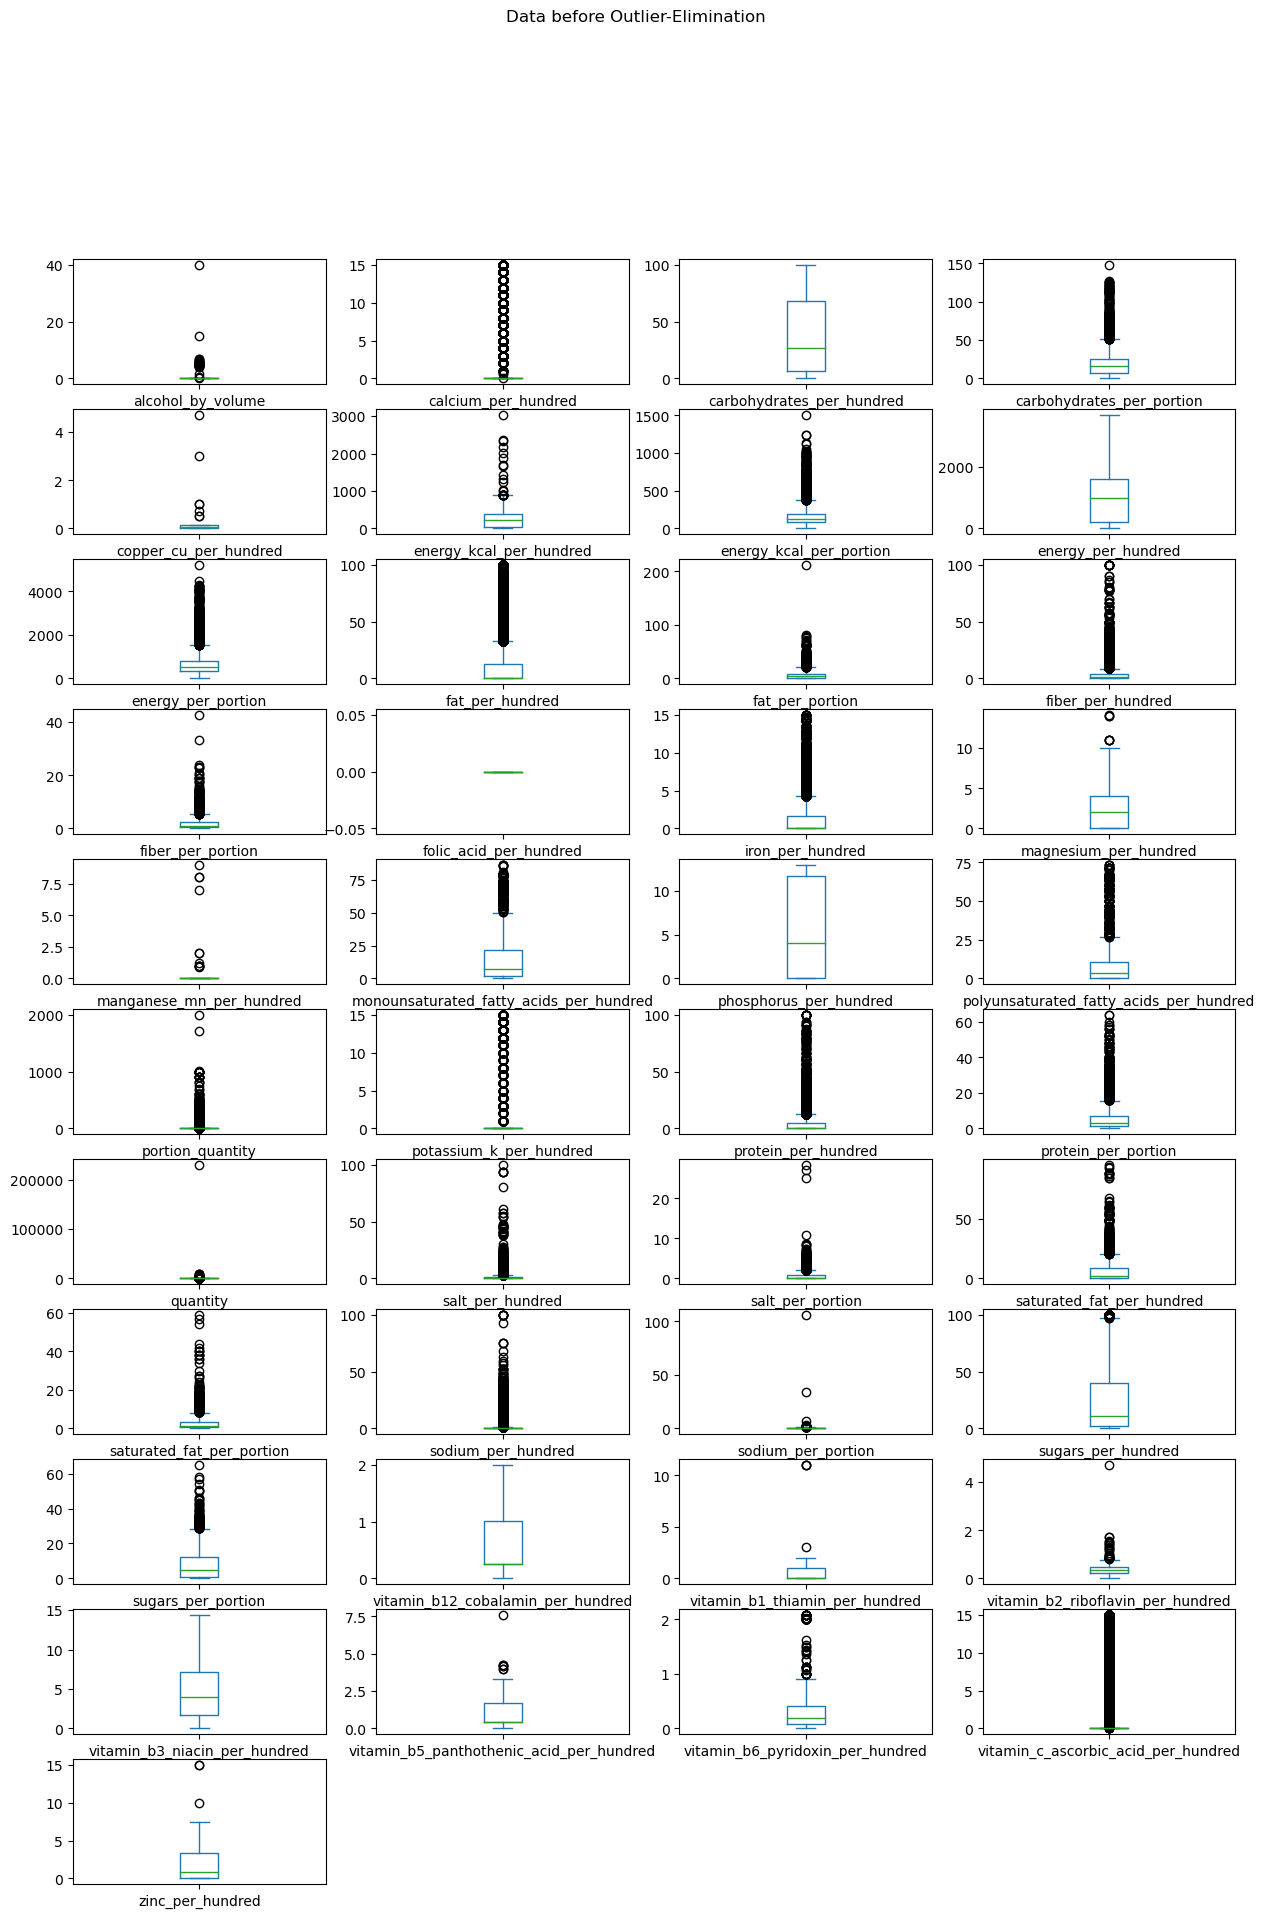

In [91]:
ofr_data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before Outlier-Elimination', figsize=(15,25),layout=(13,4))
plt.show()

From boxplots above we see that a lot of observation are very distant from the rest of the data, so we are going to address that now

Firstly, we will roughly remove the values that do not belong to the data

In [92]:
ofr_data.shape

(113625, 84)

In [93]:
df_energy = ofr_data.loc[(ofr_data["energy_per_hundred"] > 50000)]
df_energy

Empty DataFrame
Columns: [alcohol_by_volume, calcium_per_hundred, calcium_unit, carbohydrates_per_hundred, carbohydrates_per_portion, carbohydrates_unit, cholesterol_unit, copper_cu_per_hundred, copper_cu_unit, country, created_at, energy_kcal_per_hundred, energy_kcal_per_portion, energy_kcal_unit, energy_per_hundred, energy_per_portion, energy_unit, fat_per_hundred, fat_per_portion, fat_unit, fatty_acids_total_saturated_unit, fatty_acids_total_trans_unit, fiber_insoluble_unit, fiber_per_hundred, fiber_per_portion, fiber_soluble_unit, fiber_unit, folate_total_unit, folic_acid_per_hundred, folic_acid_unit, ingredients_en, iron_per_hundred, iron_unit, magnesium_per_hundred, magnesium_unit, manganese_mn_per_hundred, manganese_mn_unit, monounsaturated_fatty_acids_per_hundred, monounsaturated_fatty_acids_unit, phosphorus_per_hundred, phosphorus_unit, polyunsaturated_fatty_acids_per_hundred, polyunsaturated_fatty_acids_unit, portion_quantity, potassium_k_per_hundred, potassium_k_unit, protein_per_hundred, protein_per_portion, protein_unit, quantity, salt_per_hundred, salt_per_portion, salt_unit, saturated_fat_per_hundred, saturated_fat_per_portion, saturated_fat_unit, sodium_per_hundred, sodium_per_portion, sodium_unit, sugars_added_unit, sugars_per_hundred, sugars_per_portion, sugars_unit, unit, updated_at, vitamin_a_iu_unit, vitamin_b12_cobalamin_per_hundred, vitamin_b12_cobalamin_unit, vitamin_b1_thiamin_per_hundred, vitamin_b1_thiamin_unit, vitamin_b2_riboflavin_per_hundred, vitamin_b2_riboflavin_unit, vitamin_b3_niacin_per_hundred, vitamin_b3_niacin_unit, vitamin_b5_panthothenic_acid_per_hundred, vitamin_b5_panthothenic_acid_unit, vitamin_b6_pyridoxin_per_hundred, vitamin_b6_pyridoxin_unit, vitamin_c_ascorbic_acid_per_hundred, vitamin_c_ascorbic_acid_unit, vitamin_d_d2_d3_international_units_unit, zinc_per_hundred, zinc_unit, product_name]
Index: []

In [94]:
#ofr_data.drop(ofr_data[ofr_data['energy_per_hundred'] >= 5000].index, inplace = True)
#ofr_data.drop(ofr_data[ofr_data['energy_kcal_per_hundred'] >= 10000].index, inplace = True)

In [95]:
ofr_data.drop(ofr_data[ofr_data['calcium_per_hundred'] >= 2000].index, inplace = True)

In [96]:
#ofr_data.drop(ofr_data[ofr_data['carbohydrates_per_hundred'] >= 1000].index, inplace = True)

In [97]:
#ofr_data.drop(ofr_data[ofr_data['cholesterol_per_hundred'] >= 100].index, inplace = True)

In [98]:
ofr_data.drop(ofr_data[ofr_data['fat_per_hundred'] >= 500].index, inplace = True)

In [99]:
ofr_data.shape

(113625, 84)

In [100]:
per_hundred_df = ofr_data.filter(regex='per_hundred',axis=1)
per_hundred_df.head()

calcium_per_hundred  carbohydrates_per_hundred  copper_cu_per_hundred  \
0                  NaN                      75.00                    NaN   
1                  NaN                       1.50                    NaN   
2                  NaN                      52.68                    NaN   
3                  NaN                      70.40                    NaN   
4                  NaN                      37.00                    NaN   

   energy_kcal_per_hundred  energy_per_hundred  fat_per_hundred  \
0                    359.0              1500.0             0.42   
1                    242.0              1010.0            18.00   
2                    325.0              1358.3            12.08   
3                    402.0              1679.0             7.90   
4                    591.0              2470.0            44.00   

   fiber_per_hundred  folic_acid_per_hundred  iron_per_hundred  \
0                NaN                     NaN               NaN   
1                0.0                     NaN               NaN   
2                NaN                     NaN               NaN   
3                9.1                     NaN               NaN   
4                9.0                     NaN               NaN   

   magnesium_per_hundred  manganese_mn_per_hundred  \
0                    NaN                       NaN   
1                    NaN                       NaN   
2                    NaN                       NaN   
3                    NaN                       NaN   
4                    NaN                       NaN   

   monounsaturated_fatty_acids_per_hundred  phosphorus_per_hundred  \
0                                      NaN                     NaN   
1                                      NaN                     NaN   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN                     NaN   

   polyunsaturated_fatty_acids_per_hundred  potassium_k_per_hundred  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                      NaN   
3                                      NaN                      NaN   
4                                      NaN                      NaN   

   protein_per_hundred  salt_per_hundred  saturated_fat_per_hundred  \
0                11.00               NaN                        NaN   
1                19.00              0.50                      11.00   
2                19.05              0.25                       3.03   
3                 6.80               NaN                       4.20   
4                 8.00              0.06                      27.00   

   sodium_per_hundred  sugars_per_hundred  vitamin_b12_cobalamin_per_hundred  \
0                 NaN                 NaN                                NaN   
1                 NaN                1.50                                NaN   
2                 NaN                0.25                                NaN   
3                 NaN               65.80                                NaN   
4                 NaN               29.00                                NaN   

   vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
0                             NaN                                NaN   
1                             NaN                                NaN   
2                             NaN                                NaN   
3                             NaN                                NaN   
4                             NaN                                NaN   

   vitamin_b3_niacin_per_hundred  vitamin_b5_panthothenic_acid_per_hundred  \
0                            NaN                                       NaN   
1                            NaN                                       NaN  

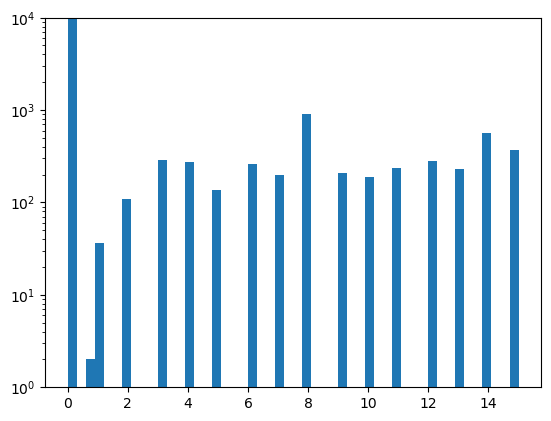

In [101]:
plt.hist(ofr_data["calcium_per_hundred"], bins=50)
plt.yscale("log")
plt.ylim(1, 10000)
plt.show()

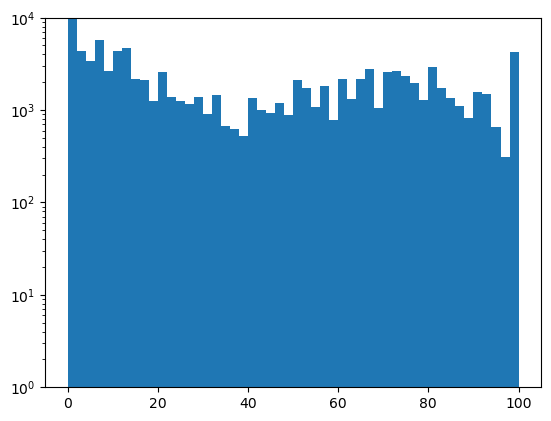

In [102]:
plt.hist(ofr_data["carbohydrates_per_hundred"], bins=50)
plt.yscale("log")
plt.ylim(1, 10000)
plt.show()

In [103]:
#ofr_data["cholesterol_per_hundred"].isnull().sum()
#plt.hist(ofr_data["cholesterol_per_hundred"], bins=50)
#plt.yscale("log")
#plt.ylim(1, 1000)
#plt.show()

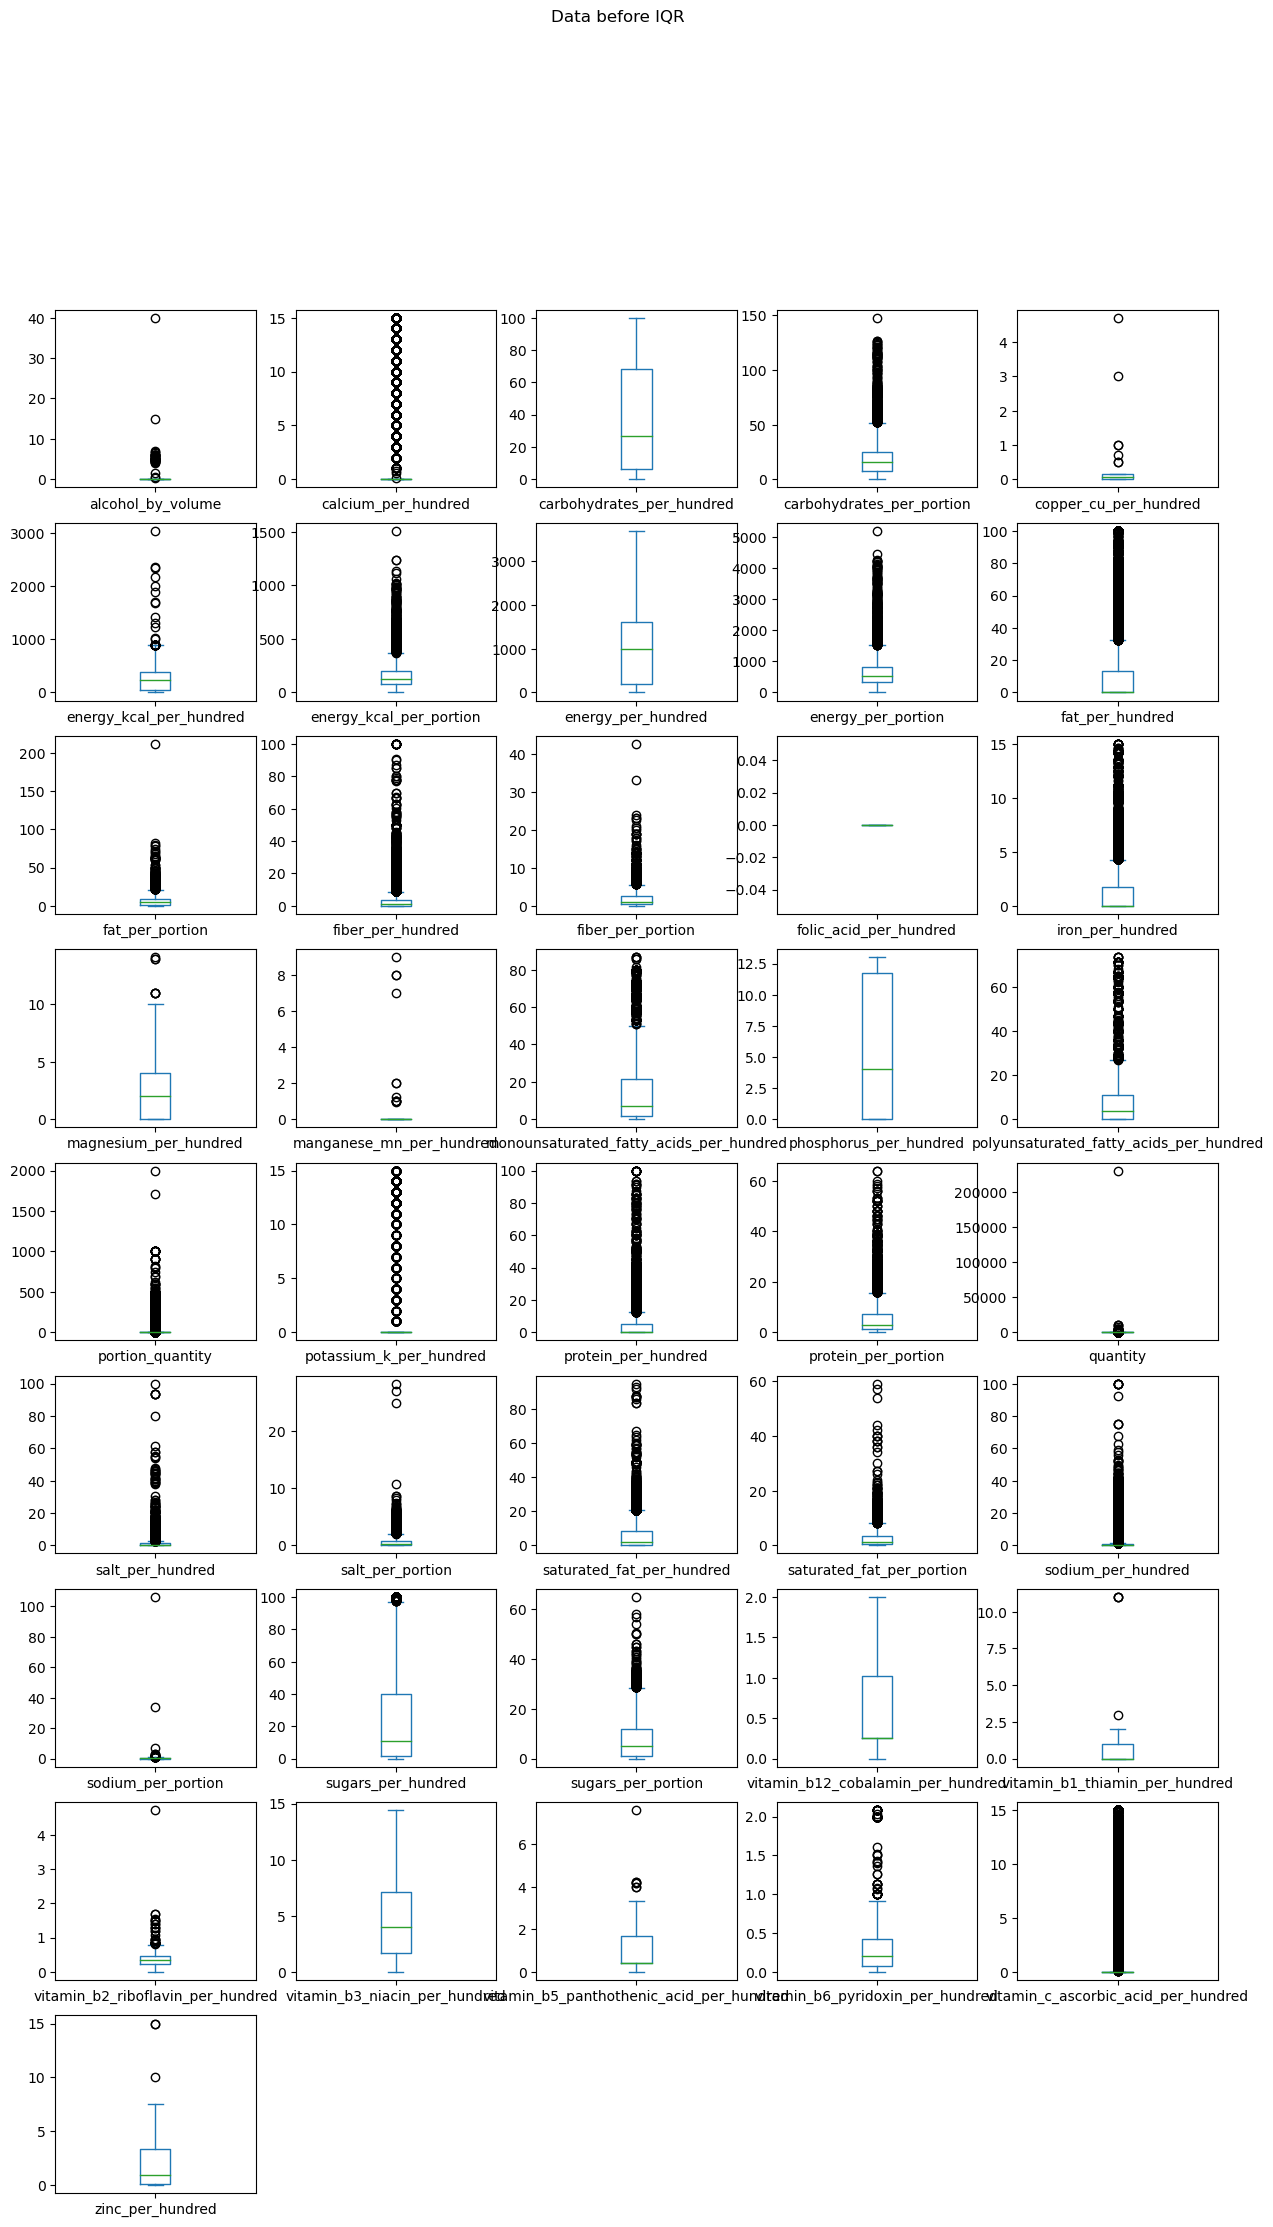

In [104]:
ofr_data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before IQR',figsize=(15,30),layout=(11,5))
plt.show()

In [105]:
list(per_hundred_df)

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fiber_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin_b6_pyridoxin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'zinc_per_hundred']

We want to visualize data using boxplot

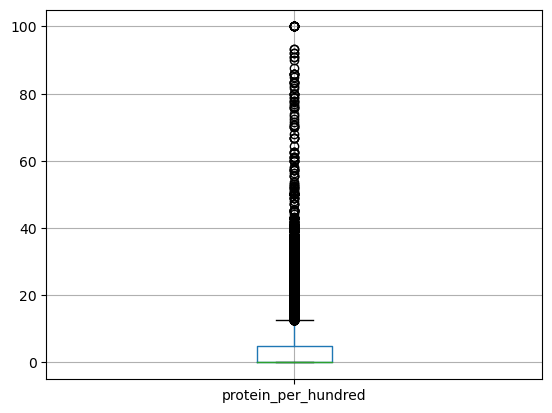

In [106]:
def plot_boxplot(df, ch):
    df.boxplot(column=[ch])
    plt.show()
plot_boxplot(ofr_data, "protein_per_hundred")

##### Removeing outliers

In [107]:
#https://www.quora.com/How-can-I-remove-outliers-in-a-large-dataset-with-pandas/answer/Joel-Pires-3
# defining fucntion called "outliers" which returns a list of index of outliers 
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(df, ch):
    Q1 = df[ch].quantile(0.25)
    Q3 = df[ch].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #creating a list that will store indexes of outliers
    ls = df.index[(df[ch] < lower_bound) | (df[ch] > upper_bound)]
    # we use these two conditions because if either of these conditions are true it means that it its an outlier
    return ls





In [108]:
#creating an empty list to store outputs from mulitple columns

index_list = []
for per_hundred in ['carbohydrates_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'copper_cu_per_hundred',
 'fat_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'protein_per_hundred',
]:
    #we want to save output indexes into the same list and to do that we are going to use extand fucntion
    index_list.extend(outliers(ofr_data, per_hundred))

In [109]:
#indexes of outliers : it shows that in this row is an outlier
#index_list

In [110]:
#defining function called "remove" which returns cleaned df without outliers
def remove(df, lis):
    lis=sorted(set(lis))
    df=df.drop(lis)
    return df

In [111]:

df_cleaned = remove(ofr_data, index_list)

In [112]:
df_cleaned.shape

(88776, 84)

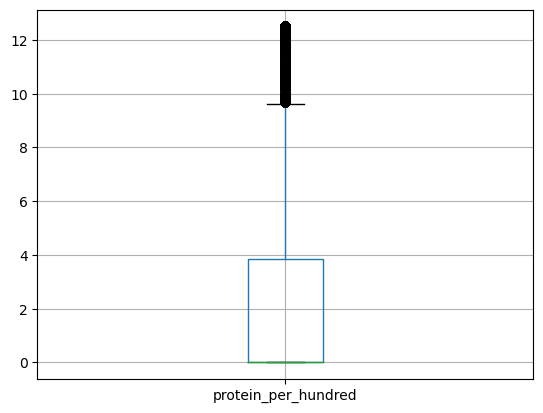

In [113]:
plot_boxplot(df_cleaned, "protein_per_hundred")

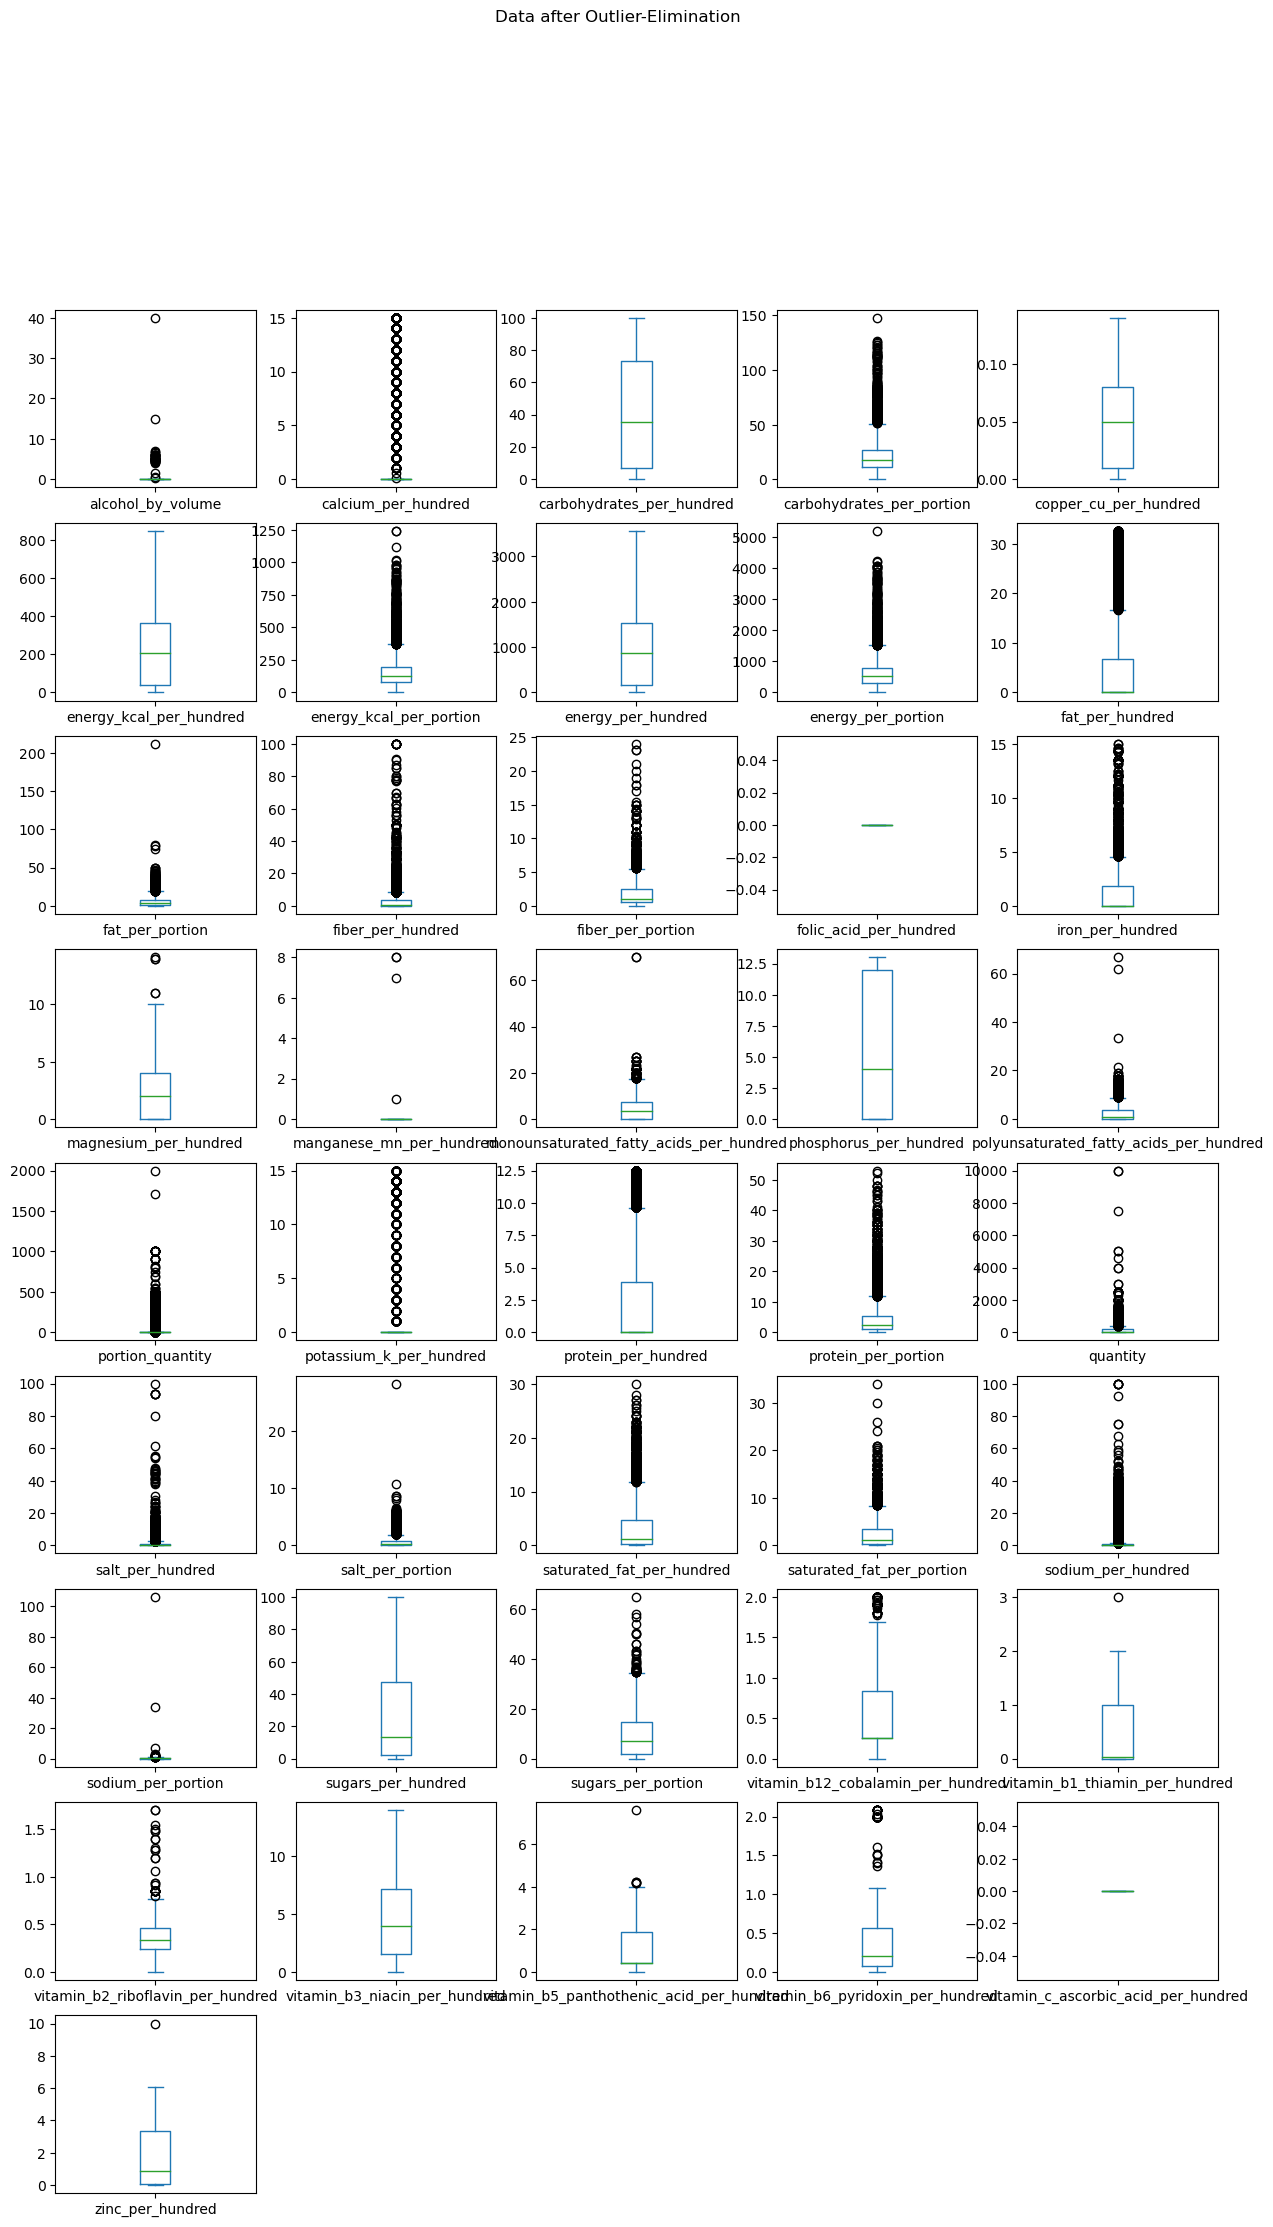

In [114]:
df_cleaned.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data after Outlier-Elimination', figsize=(15,30),layout=(11,5))
plt.show()

we will dedicate a little bit more attention to column energy_per_hundred since we need it for later

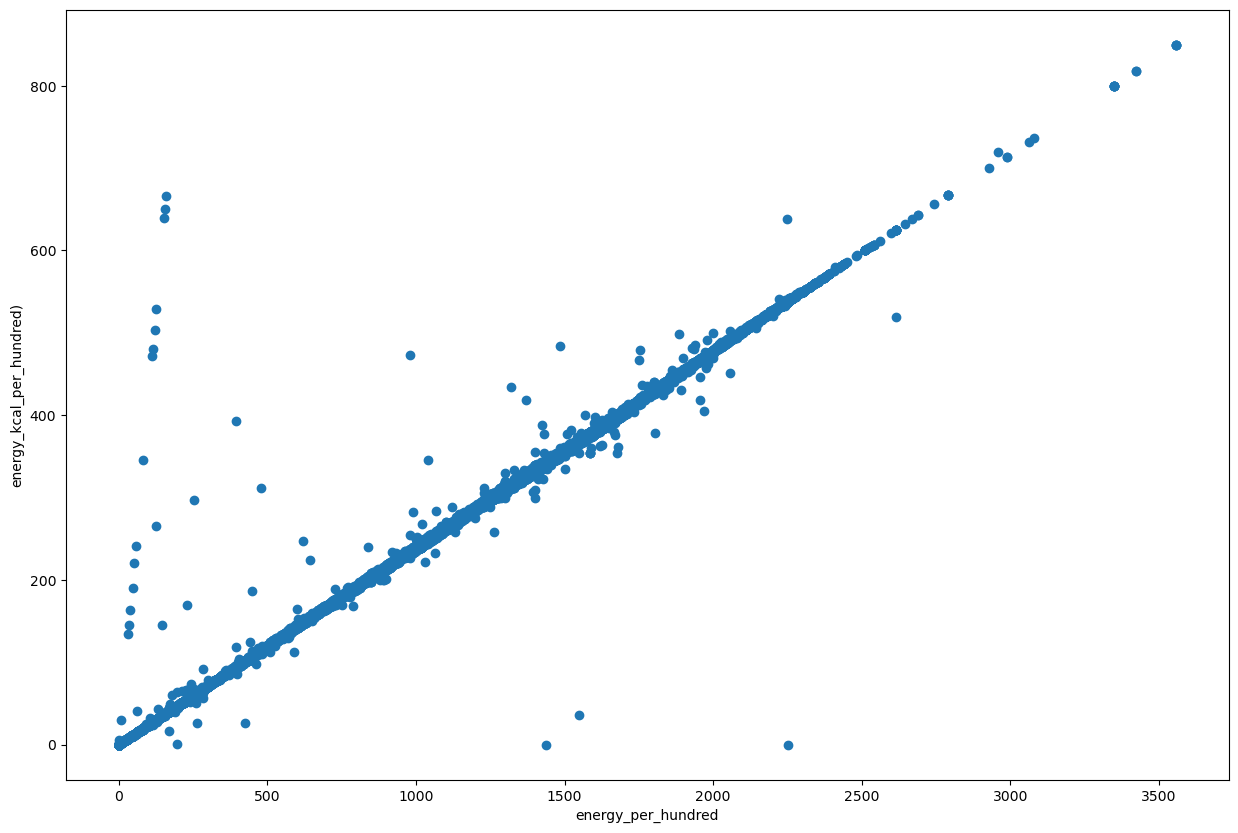

In [115]:

# Scatter plot
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(df_cleaned['energy_per_hundred'], df_cleaned['energy_kcal_per_hundred'])
 
# x-axis label
ax.set_xlabel('energy_per_hundred')
 
# y-axis label
ax.set_ylabel('energy_kcal_per_hundred)')
plt.show()

In [116]:
zfilterX = np.abs(df_cleaned["energy_per_hundred"] - df_cleaned["energy_per_hundred"].mean()) > (3 * df_cleaned["energy_per_hundred"].std())
zfilterX.loc[zfilterX ==True]

91277     True
108082    True
108244    True
108257    True
108261    True
108263    True
131745    True
177562    True
182539    True
195747    True
218164    True
225459    True
302181    True
328956    True
Name: energy_per_hundred, dtype: bool

In [117]:
zfilterX.drop(zfilterX[(zfilterX ==True)].index, inplace = True)

In [118]:
df_cleaned.shape

(88776, 84)

In [119]:
list_float = df_cleaned.select_dtypes(include=['float64']).columns.to_list()
for i in list_float:
    df_cleaned[i].fillna(0, inplace=True)

From the graphs shown above, we can see that our data looks much nicer.
Now we will save our cleaned data in a new csv file.

In [120]:
df_cleaned.to_csv("data_385k_cleaned.csv", index=False)

## C. In-depth Exploratory Data Analysis

In [121]:
df = pd.read_csv('data_385k_cleaned.csv', low_memory=False)

##### __The minerals’ distribution per country__

In [122]:
col = [col for col in df.columns if col in ['calcium_per_hundred', 'phosphorus_per_hundred', 'potassium_k_per_hundred', 
                                             'sodium_per_hundred', 'magnesium_per_hundred', 'iron_per_hundred',
                                             'copper_cu_per_hundred','manganese_mn_per_hundred', 'country']]
df2 = df[col]

In [123]:
df2

calcium_per_hundred  copper_cu_per_hundred country  iron_per_hundred  \
0                      0.0                    0.0      CH               0.0   
1                      0.0                    0.0      CH               0.0   
2                      0.0                    0.0      CH               0.0   
3                      0.0                    0.0      CH               0.0   
4                      0.0                    0.0      CH               0.0   
...                    ...                    ...     ...               ...   
88771                  0.0                    0.0      CH               0.0   
88772                  0.0                    0.0      CH               0.0   
88773                  0.0                    0.0      CH               0.0   
88774                  0.0                    0.0      CH               0.0   
88775                  0.0                    0.0      CH               0.0   

       magnesium_per_hundred  manganese_mn_per_hundred  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
...                      ...                       ...   
88771                    0.0                       0.0   
88772                    0.0                       0.0   
88773                    0.0                       0.0   
88774                    0.0                       0.0   
88775                    0.0                       0.0   

       phosphorus_per_hundred  potassium_k_per_hundred  sodium_per_hundred  
0                         0.0                      0.0                 0.0  
1                         0.0                      0.0                 0.0  
2                         0.0                      0.0                 0.0  
3                         0.0                      0.0                 0.0  
4                         0.0                      0.0                 0.0  
...                       ...                      ...                 ...  
88771                     0.0                      0.0                 0.0  
88772                     0.0                      0.0                 0.0  
88773                     0.0                      0.0                 0.0  
88774                     0.0                      0.0                 0.0  
88775                     0.0                      0.0                 0.0  

[88776 rows x 9 columns]

In [124]:
gr = df2.groupby('country')
gr.first()

calcium_per_hundred  copper_cu_per_hundred  iron_per_hundred  \
country                                                                 
CH                       0.0                    0.0               0.0   
DE                       0.0                    0.0               0.0   
FR                       0.0                    0.0               0.0   
IT                       0.0                    0.0               0.0   
UK                       0.0                    0.0               0.0   
US                       0.0                    0.0               0.0   

         magnesium_per_hundred  manganese_mn_per_hundred  \
country                                                    
CH                         0.0                       0.0   
DE                         0.0                       0.0   
FR                         0.0                       0.0   
IT                         0.0                       0.0   
UK                         0.0                       0.0   
US                         0.0                       0.0   

         phosphorus_per_hundred  potassium_k_per_hundred  sodium_per_hundred  
country                                                                       
CH                          0.0                      0.0                 0.0  
DE                          0.0                      0.0                 0.0  
FR                          0.0                      0.0                 0.0  
IT                          0.0                      0.0                 0.0  
UK                          0.0                      0.0                 0.0  
US                          0.0                      0.0                 0.0

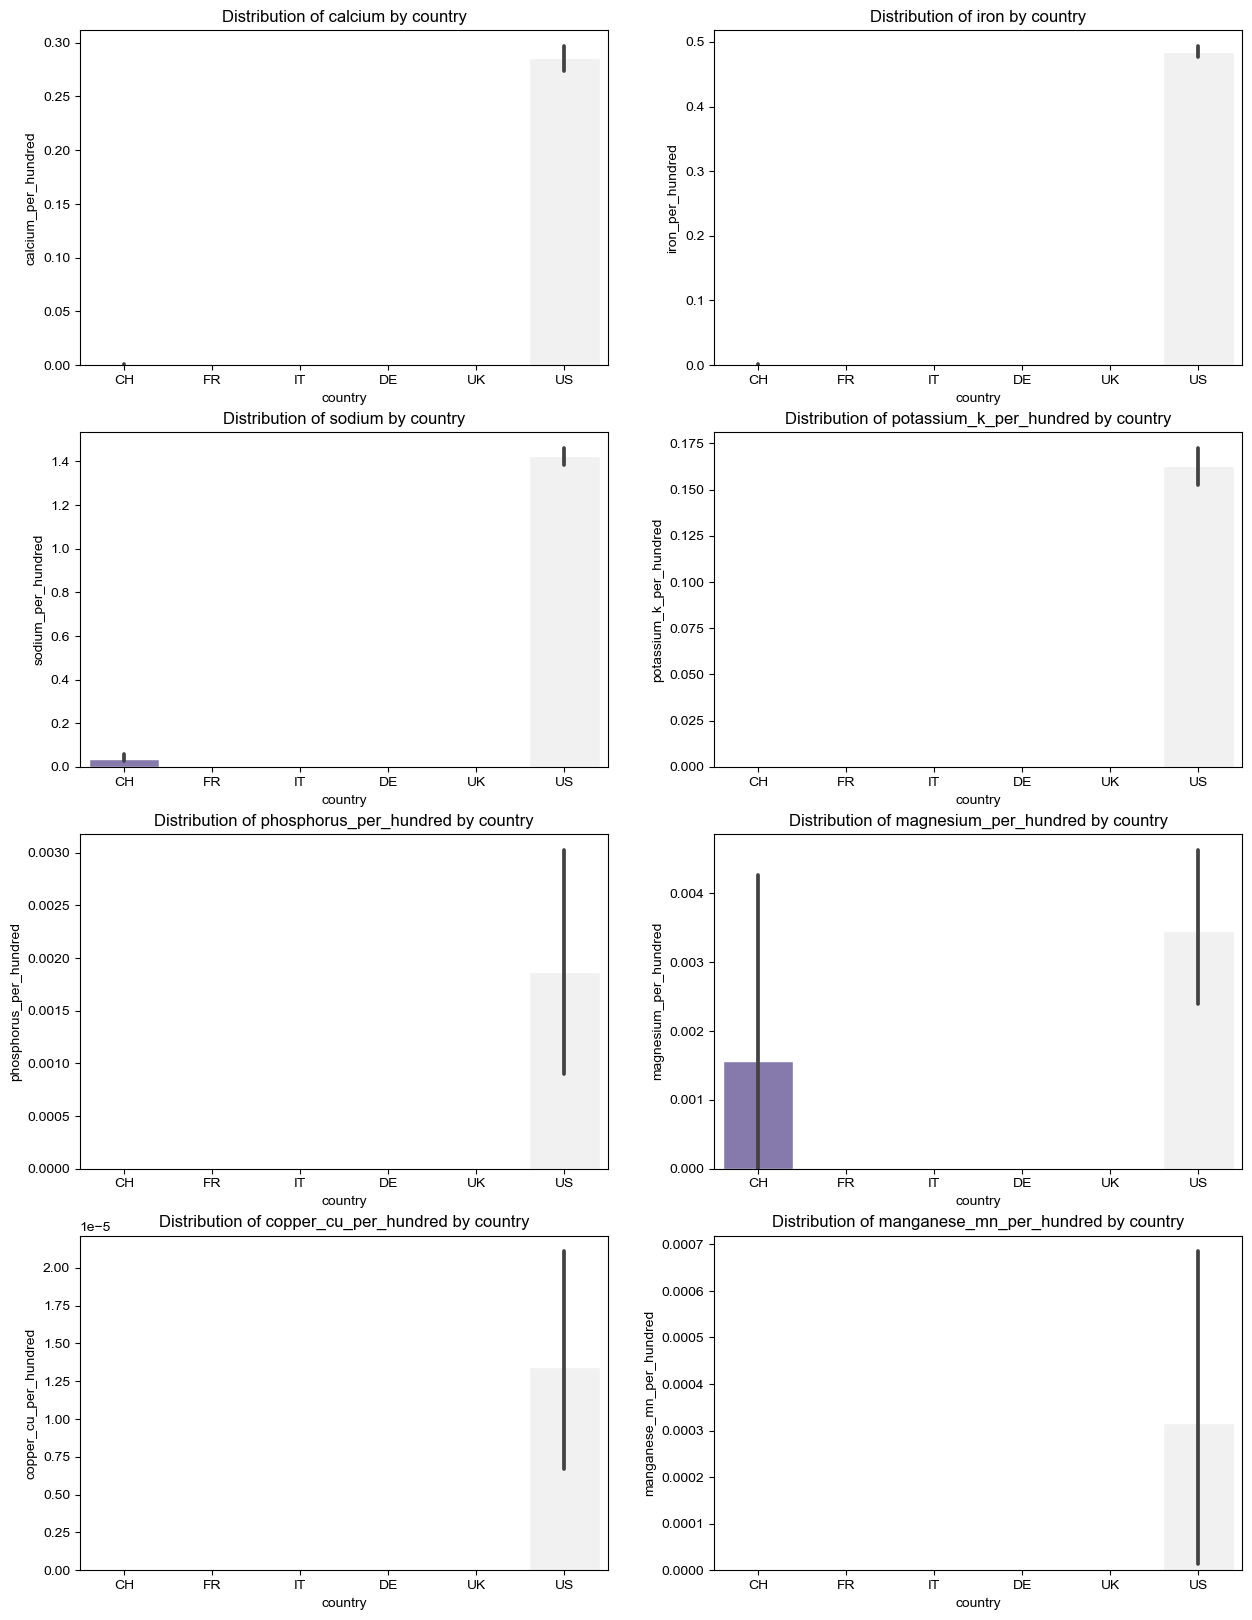

In [125]:
#defining plotting region
fig, axes = plt.subplots(4,2,figsize=(15, 20))
#ax is a two-dimensional array: one dimension for the rows, one for the columns
#so we are going to be flattening ax first
axes = axes.flatten()
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.barplot(data=df2, x='country', y="calcium_per_hundred", ax=axes[0], palette="light:m_r").set(title='Distribution of calcium by country')
sns.barplot(data=df2, x='country', y="iron_per_hundred", ax=axes[1], palette="light:m_r").set(title='Distribution of iron by country')
sns.barplot(data=df2, x='country', y="sodium_per_hundred", ax=axes[2], palette="light:m_r").set(title='Distribution of sodium by country')
sns.barplot(data=df2, x='country', y="potassium_k_per_hundred", ax=axes[3], palette="light:m_r").set(title='Distribution of potassium_k_per_hundred by country')
sns.barplot(data=df2, x='country', y="phosphorus_per_hundred", ax=axes[4], palette="light:m_r").set(title='Distribution of phosphorus_per_hundred by country')
sns.barplot(data=df2, x='country', y="magnesium_per_hundred", ax=axes[5], palette="light:m_r").set(title='Distribution of magnesium_per_hundred by country')
sns.barplot(data=df2, x='country', y="copper_cu_per_hundred", ax=axes[6], palette="light:m_r").set(title='Distribution of copper_cu_per_hundred by country')
sns.barplot(data=df2, x='country', y="manganese_mn_per_hundred", ax=axes[7], palette="light:m_r").set(title='Distribution of manganese_mn_per_hundred by country')
plt.show()

In some plots we got error bars that are representations of data variability and are used on graphs to indicate uncertainty in a reported measurement.

## D. Text data

##### __Most frequent ingredients in products__

In [126]:
df = df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
df['ingredients_en'].sample

<bound method NDFrame.sample of 0        superior quality durum wheat pasta\r\n\r\ningr...
1        powdered chocolate 99% (sugar, cocoa), emulsif...
2        sugar, whole milk powder, cocoa butter, cocoa ...
3                                                    honey
4        sugar, skimmed milk powder, cocoa butter, gluc...
                               ...                        
88771                                                 none
88772                                                 none
88773                                                 none
88774                                                 none
88775                                                 none
Name: ingredients_en, Length: 88776, dtype: object>

In [127]:
df["ingredients_en"].iloc[3]

'honey'

In [128]:
df['ingredients_en'] = df.ingredients_en.str.replace(' and ?' , ',', regex=True)
df['ingredients_en'] = df.ingredients_en.str.replace(' and/?' , ',', regex=True)

In [129]:
df['ingredients_en']

0        superior quality durum wheat pasta\r\n\r\ningr...
1        powdered chocolate 99% (sugar, cocoa), emulsif...
2        sugar, whole milk powder, cocoa butter, cocoa ...
3                                                    honey
4        sugar, skimmed milk powder, cocoa butter, gluc...
                               ...                        
88771                                                 none
88772                                                 none
88773                                                 none
88774                                                 none
88775                                                 none
Name: ingredients_en, Length: 88776, dtype: object

In [130]:
df['ingredients_en'] = df.ingredients_en.str.replace(r"[\"\'\(\)\[\]\{\}\…\-\:\?\&\*\+\|\%]", ',', regex=True)

In [131]:
df['ingredients_en']

0        superior quality durum wheat pasta\r\n\r\ningr...
1        powdered chocolate 99, ,sugar, cocoa,, emulsif...
2        sugar, whole milk powder, cocoa butter, cocoa ...
3                                                    honey
4        sugar, skimmed milk powder, cocoa butter, gluc...
                               ...                        
88771                                                 none
88772                                                 none
88773                                                 none
88774                                                 none
88775                                                 none
Name: ingredients_en, Length: 88776, dtype: object

In [132]:
df['ingredients_en'] = df.ingredients_en.str.strip()

In [133]:
df['ingredients_en']

0        superior quality durum wheat pasta\r\n\r\ningr...
1        powdered chocolate 99, ,sugar, cocoa,, emulsif...
2        sugar, whole milk powder, cocoa butter, cocoa ...
3                                                    honey
4        sugar, skimmed milk powder, cocoa butter, gluc...
                               ...                        
88771                                                 none
88772                                                 none
88773                                                 none
88774                                                 none
88775                                                 none
Name: ingredients_en, Length: 88776, dtype: object

In [134]:
df['ingredients_en'] = df.ingredients_en.str.replace(', ,', ',')
df['ingredients_en'] = df.ingredients_en.str.replace(' ,', ', ')
df['ingredients_en'] = df.ingredients_en.str.replace(',,', ',')

In [135]:
df['ingredients_en']

0        superior quality durum wheat pasta\r\n\r\ningr...
1        powdered chocolate 99,sugar, cocoa, emulsifier...
2        sugar, whole milk powder, cocoa butter, cocoa ...
3                                                    honey
4        sugar, skimmed milk powder, cocoa butter, gluc...
                               ...                        
88771                                                 none
88772                                                 none
88773                                                 none
88774                                                 none
88775                                                 none
Name: ingredients_en, Length: 88776, dtype: object

In [136]:
ingredients = df['ingredients_en'].str.split(',').apply(Series, 1).stack()

In [137]:
ingredients.index = ingredients.index.droplevel(-1)
ingredients.name = 'ingredients'
data_ingredients = df.join(ingredients)

In [138]:
print('Number of unique ingredients: {}'.format(data_ingredients['ingredients'].dropna().unique().shape[0]))

Number of unique ingredients: 61578


In [139]:
data_ingredients = data_ingredients[data_ingredients.ingredients != ' ']
data_ingredients = data_ingredients[data_ingredients.ingredients != '.']
data_ingredients = data_ingredients[data_ingredients.ingredients != '']

In [140]:
print('The ten most common ingredients:\n{}'.format(data_ingredients['ingredients'].value_counts().head(10)))

The ten most common ingredients:
 salt              33879
 sugar             27922
 water             25319
 citric acid       22523
 natural           12145
 corn syrup        11346
sugar              10630
 natural flavor     8649
 preservative       8229
 soy lecithin       8069
Name: ingredients, dtype: int64


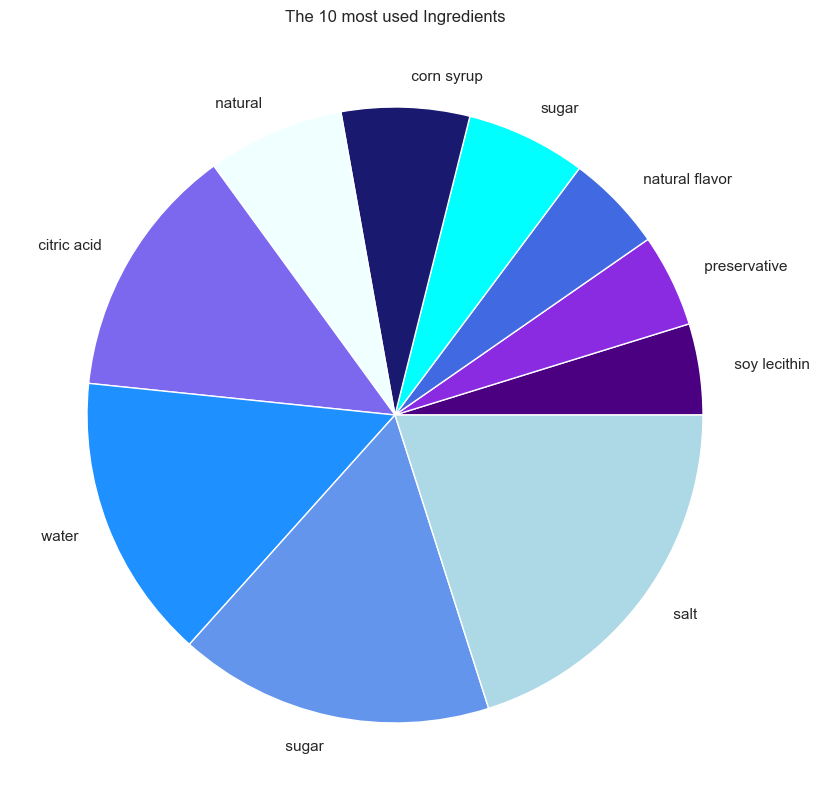

In [141]:

data_ingredients['ingredients'].value_counts().head(10).sort_values().plot(kind='pie', figsize=(15,10), 
                                                                           colors=["indigo",
                                                                                   "blueviolet",
                                                                                   "royalblue",
                                                                                   "cyan",
                                                                                   "midnightblue",
                                                                                   "azure",
                                                                                   "mediumslateblue",
                                                                                  "dodgerblue",
                                                                                   "cornflowerblue", "lightblue"])
plt.title('The 10 most used Ingredients')
plt.ylabel('')
plt.show()

##### __The longest ingredients list__

In [142]:
data_ingredients['len'] = data_ingredients['ingredients'].apply(len)

In [143]:
max_ing_list=data_ingredients[['product_name','ingredients', 'len']][data_ingredients.len == data_ingredients['len'].max()]
max_ing_list

product_name                                        ingredients  len
58606  dark chocolate  ; sugar; corn syrup; maltodextrin; deionized a...  389
61487  dark chocolate  ; sugar; corn syrup; maltodextrin; deionized a...  389
61490  dark chocolate  ; sugar; corn syrup; maltodextrin; deionized a...  389

##### __Products that have the shortest ingredients list__

In [144]:
min_ing_list=data_ingredients[['product_name','ingredients', 'len']][data_ingredients.len == data_ingredients['len'].min()].reset_index()
min_ing_list

index                                       product_name ingredients  len
0       11   michel et augustin : super cookies coeur fondant           3    1
1       11   michel et augustin : super cookies coeur fondant           8    1
2       11   michel et augustin : super cookies coeur fondant           8    1
3       25                                  coca-cola : light           k    1
4       72                 barilla : arrabbiata, sauce tomate           9    1
..     ...                                                ...         ...  ...
909  88255  peach bellini sparkling hydration energy drink...           l    1
910  88315                   marietta, chocolate chip cookies           9    1
911  88317                 marietta, chocolate candy galletas           9    1
912  88320                  marietta, chocolate candy cookies           9    1
913  88751                 fit food - vegan deli (jardinière)           4    1

[914 rows x 4 columns]

In [145]:
df.duplicated().sum()

2058

In [146]:
df.drop_duplicates(inplace=True)

In [147]:
df.duplicated().sum()

0

## E. Time-series data

##### __1.Exploring the total number of items created each month at each hour__

We are going to work with the created_at column that stores the date and time at wich products were added to the Open Food database.

We are going to investigate the total number of items created each month at each hour. We will use the created_at column to draw a heatmap with the hours (0 to 23) on the 
x
-axis and the months (1 to 12) on the 
y
-axis. The color of the heatmap should show the number of items created at each month-hour pair.

In [148]:
df_e = df.loc[:,['created_at','country']]

In [149]:
df_e.head()

created_at country
0  2016-06-01t11:42:22.908z      ch
1  2016-06-01t11:42:26.184z      ch
2  2016-06-02t14:01:44.255z      ch
3  2016-06-02t14:01:53.274z      ch
4  2016-06-02t14:01:53.348z      ch

In [150]:
df_e.isnull().sum()

created_at    0
country       0
dtype: int64

Now we are going to transfrom are time-series data to appropraite model form

In [151]:
df_e['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_e["created_at"]

0       2016-06-01 11:42:22.908
1       2016-06-01 11:42:26.184
2       2016-06-02 14:01:44.255
3       2016-06-02 14:01:53.274
4       2016-06-02 14:01:53.348
                  ...          
88771   2021-10-03 15:04:04.198
88772   2021-10-03 15:12:50.677
88773   2021-10-03 15:21:16.659
88774   2021-10-03 15:29:47.648
88775   2021-10-04 14:02:42.220
Name: created_at, Length: 86718, dtype: datetime64[ns]

New column with months

In [152]:
df_e['month'] = df_e['created_at'].dt.month

In [153]:
df_e.head()

created_at country  month
0 2016-06-01 11:42:22.908      ch      6
1 2016-06-01 11:42:26.184      ch      6
2 2016-06-02 14:01:44.255      ch      6
3 2016-06-02 14:01:53.274      ch      6
4 2016-06-02 14:01:53.348      ch      6

New column with hours

In [154]:
df_e['hours'] = df_e['created_at'].dt.hour

In [155]:
df_e.head()

created_at country  month  hours
0 2016-06-01 11:42:22.908      ch      6     11
1 2016-06-01 11:42:26.184      ch      6     11
2 2016-06-02 14:01:44.255      ch      6     14
3 2016-06-02 14:01:53.274      ch      6     14
4 2016-06-02 14:01:53.348      ch      6     14

Grouping the number of products produced every month and every hour

In [156]:
g=df_e.groupby(["hours", "month"]).agg(["count"])["created_at"]
g

count
hours month       
0     7        238
      8          3
1     7         55
      8          1
2     5          1
...            ...
22    7        263
      8          3
      11         3
23    7        224
      8          2

[203 rows x 1 columns]

Putting previous values in the pivot table

In [157]:
table = pd.pivot_table(g, index='hours', columns='month', values="count")
table

month    1     2     3        4     5      6      7     8      9      10  \
hours                                                                      
0       NaN   NaN   NaN      NaN   NaN    NaN  238.0   3.0    NaN    NaN   
1       NaN   NaN   NaN      NaN   NaN    NaN   55.0   1.0    NaN    NaN   
2       NaN   NaN   NaN      NaN   1.0    NaN    NaN   2.0    NaN    NaN   
3       NaN   NaN   NaN      NaN   NaN    NaN    NaN   NaN    NaN    NaN   
5       NaN   NaN   NaN     16.0   NaN    1.0    NaN   1.0   22.0    NaN   
6       2.0   NaN   2.0     25.0  10.0  181.0  494.0   6.0  253.0   41.0   
7      21.0   1.0  15.0     95.0  33.0   70.0  106.0  24.0   58.0   31.0   
8      50.0  62.0  55.0     51.0  49.0   75.0   37.0  23.0   73.0   64.0   
9      99.0  40.0  43.0     57.0  25.0   84.0   30.0  36.0  108.0   25.0   
10     60.0  31.0  61.0  73896.0  26.0   29.0  222.0  12.0   83.0   20.0   
11      9.0   7.0  95.0     55.0  38.0   31.0   40.0  16.0  192.0   57.0   
12     38.0  29.0  51.0     61.0  28.0  108.0   34.0  17.0  244.0  125.0   
13     46.0  45.0  59.0     53.0  33.0   70.0   32.0  31.0  138.0   19.0   
14     27.0  23.0  64.0     66.0  31.0  157.0   51.0  28.0   41.0   11.0   
15     15.0  18.0  71.0     13.0  21.0   76.0   93.0  19.0  137.0   91.0   
16      2.0   3.0  21.0      6.0   4.0   43.0  531.0  28.0  765.0    3.0   
17      6.0   4.0  43.0      7.0   6.0   13.0  190.0  15.0  375.0    5.0   
18      1.0   NaN   2.0      2.0   2.0   11.0  199.0  16.0  336.0   17.0   
19      5.0   8.0  11.0     16.0  11.0    4.0  254.0  27.0  637.0    7.0   
20      1.0   6.0  39.0      5.0   NaN    7.0  551.0  22.0    3.0   35.0   
21      NaN  47.0   5.0      8.0   NaN    5.0  261.0   5.0  190.0   12.0   
22      1.0   NaN   NaN      NaN   NaN   29.0  263.0   3.0    NaN    NaN   
23      NaN   NaN   NaN      NaN   NaN    NaN  224.0   2.0    NaN    NaN   

month     11    12  
hours               
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        1.0   NaN  
5        NaN   NaN  
6        NaN   1.0  
7      108.0  18.0  
8      134.0  29.0  
9      125.0  48.0  
10      34.0  40.0  
11     105.0  10.0  
12      57.0  25.0  
13      94.0  73.0  
14      34.0  35.0  
15      12.0   4.0  
16      49.0  12.0  
17       4.0  25.0  
18       5.0   4.0  
19      40.0   4.0  
20      10.0  15.0  
21       NaN  12.0  
22       3.0   NaN  
23       NaN   NaN







Heatmap

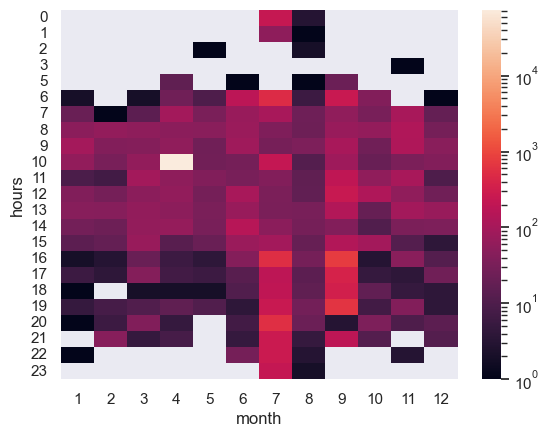

In [158]:
sns.heatmap(table, norm=LogNorm())
plt.show()



As we can see in the heatmap there is a lot of NaN values

##### __2.Evolution of the total number of items over time__

Combining year and month into signle value YYYY-MM

In [159]:
df_e["yearMonth"] = df_e["created_at"].dt.strftime('%Y-%m')
df_e["yearMonth"]

0        2016-06
1        2016-06
2        2016-06
3        2016-06
4        2016-06
          ...   
88771    2021-10
88772    2021-10
88773    2021-10
88774    2021-10
88775    2021-10
Name: yearMonth, Length: 86718, dtype: object

In [160]:
df_e.head()

created_at country  month  hours yearMonth
0 2016-06-01 11:42:22.908      ch      6     11   2016-06
1 2016-06-01 11:42:26.184      ch      6     11   2016-06
2 2016-06-02 14:01:44.255      ch      6     14   2016-06
3 2016-06-02 14:01:53.274      ch      6     14   2016-06
4 2016-06-02 14:01:53.348      ch      6     14   2016-06



Dropping columns that we don't need any more

In [161]:
df_e.drop(["created_at", "month", "hours"], axis=1, inplace=True)

In [162]:
df_e.head()

country yearMonth
0      ch   2016-06
1      ch   2016-06
2      ch   2016-06
3      ch   2016-06
4      ch   2016-06

We are going to use crosstab do group data 

In [163]:
table3 = pd.crosstab(df_e[ "yearMonth"],df_e["country"] )

Ploting stacked bar plot

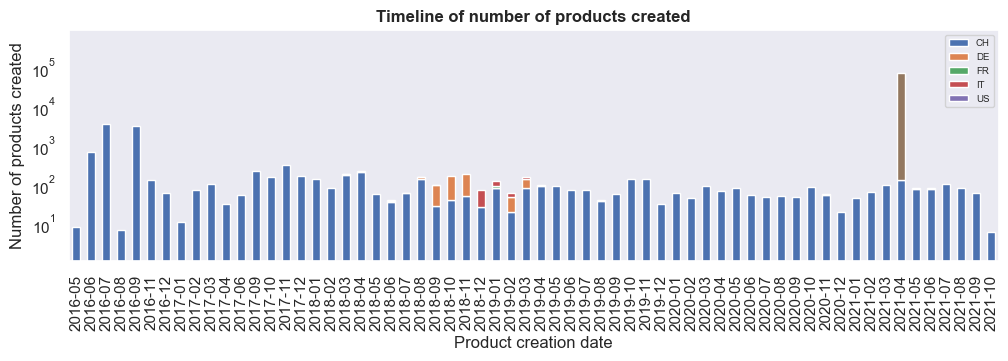

In [164]:
plt.rcParams["figure.figsize"] = (12,3)
table3.plot.bar(stacked=True,title='Timeline of number of products created')
plt.yscale('log')
plt.xlabel("Product creation date")
plt.ylabel("Number of products created")
plt.ylim(1.1, 900000)
plt.legend(["CH","DE", "FR", "IT", "US"], loc="upper right", prop = {'size' : 7})
plt.title('Timeline of number of products created', fontweight="bold")
plt.show()

## F. Correlation analysis

##### __Quantifying linear relationships between the energy_per_hundred and other numerical variables__

Our task is to quantify the linear relationship between the energy per_hundred and other numberical variables.
We will use the per_hundred columns and find their corealtions with energy_per_hundred

In [165]:
df.reset_index(inplace=True)

In [166]:
new_columns = ['energy_kcal_per_hundred',
               'energy_per_hundred', 
               
               'calcium_per_hundred', 
               'carbohydrates_per_hundred',
              
               'fat_per_hundred',
               
            'fiber_per_hundred',
            'iron_per_hundred', 'protein_per_hundred', 'sodium_per_hundred',
       'sugars_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']
#'fatty_acids_total_saturated_per_hundred', 'cholesterol_per_hundred','vitamin_a_iu_per_hundred','fatty_acids_total_trans_per_hundred', 

In [167]:
df_f1 = df[new_columns]

In [168]:
df_f1["energy_per_hundred"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        1500.0
1        1679.0
2        2235.0
3        1370.0
4        2108.0
          ...  
86713    2190.0
86714    1710.0
86715     778.0
86716     443.0
86717     858.0
Name: energy_per_hundred, Length: 86718, dtype: float64>

In [169]:
df_f1["energy_per_hundred"].corr(df_f1["calcium_per_hundred"])

-0.08736043686107474

In [170]:
df_f1.isnull().sum()

energy_kcal_per_hundred                0
energy_per_hundred                     0
calcium_per_hundred                    0
carbohydrates_per_hundred              0
fat_per_hundred                        0
fiber_per_hundred                      0
iron_per_hundred                       0
protein_per_hundred                    0
sodium_per_hundred                     0
sugars_per_hundred                     0
vitamin_c_ascorbic_acid_per_hundred    0
dtype: int64

In [171]:
for i in new_columns[4:]:
    corr = df_f1["energy_per_hundred"].corr(df_f1[i])
    print("Correlation with %s: %f" %(i,corr))
    
    

Correlation with fat_per_hundred: 0.564342
Correlation with fiber_per_hundred: 0.242971
Correlation with iron_per_hundred: 0.324445
Correlation with protein_per_hundred: 0.468874
Correlation with sodium_per_hundred: -0.180285
Correlation with sugars_per_hundred: 0.554008
Correlation with vitamin_c_ascorbic_acid_per_hundred: nan


To conclude, high energy levels are caused by fats,carbohydrates, sugars;
low energy score by
cholesterol and vitamin_c for example are not correlated.

##### __2.Linear or non_linear relationship__




Our task is to revel the true nature of relationship, linear or non-linear

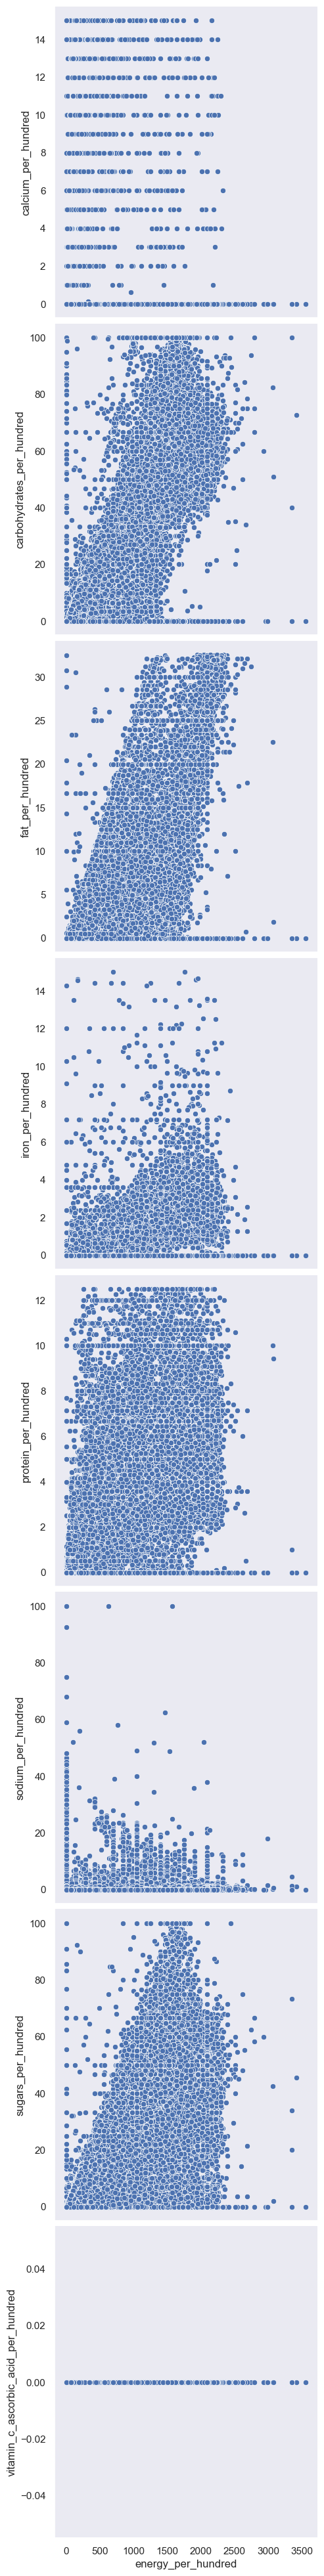

In [172]:
sns.pairplot(df_f1, height=5,
            x_vars=['energy_per_hundred'],
            y_vars= ['calcium_per_hundred', 
                     'carbohydrates_per_hundred',
                     'fat_per_hundred',
                     'iron_per_hundred',
                     'protein_per_hundred', 
                     'sodium_per_hundred', 'sugars_per_hundred',
                     'vitamin_c_ascorbic_acid_per_hundred',])
#'cholesterol_per_hundred','fatty_acids_total_saturated_per_hundred',
plt.show()

In [173]:
#correlation between two columns in absolute values 
for i in new_columns[1:]:
    corr = df_f1["energy_per_hundred"].corr(df_f1[i])
    corr = abs(corr)
    print("Correlation with %s: %f" %(i,corr))

Correlation with energy_per_hundred: 1.000000
Correlation with calcium_per_hundred: 0.087360
Correlation with carbohydrates_per_hundred: 0.827618
Correlation with fat_per_hundred: 0.564342
Correlation with fiber_per_hundred: 0.242971
Correlation with iron_per_hundred: 0.324445
Correlation with protein_per_hundred: 0.468874
Correlation with sodium_per_hundred: 0.180285
Correlation with sugars_per_hundred: 0.554008
Correlation with vitamin_c_ascorbic_acid_per_hundred: nan


Creating a scatterplot with absolute values between energy per hundred and 3 other variables that have biggest correlation

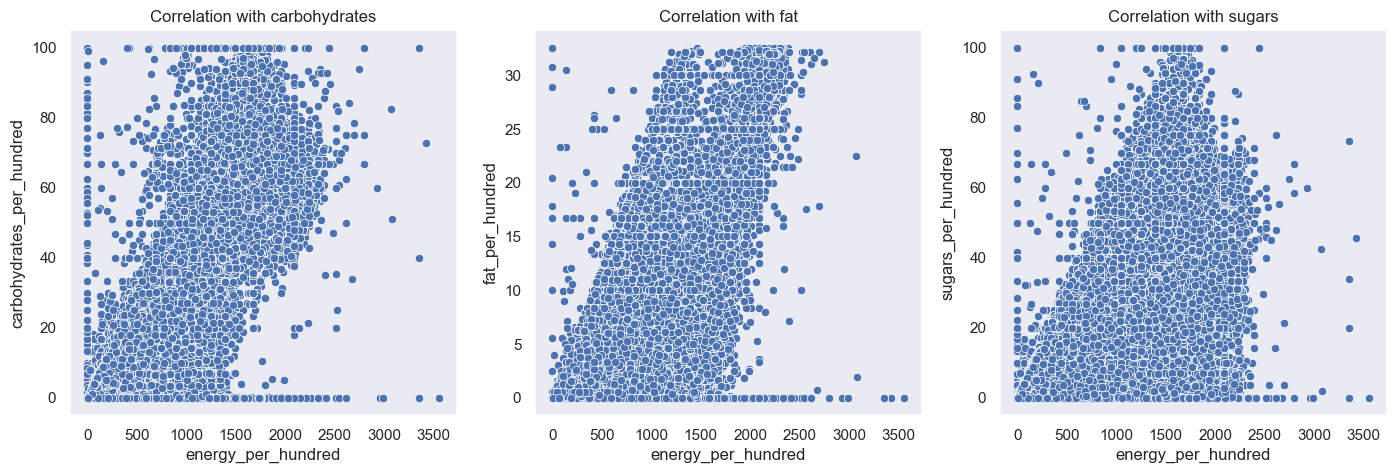

In [174]:
#defining plotting region
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.scatterplot(data=df_f1, x="energy_per_hundred", y="carbohydrates_per_hundred", ax=axes[0], palette="light:m_r").set(title='Correlation with carbohydrates')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="fat_per_hundred", ax=axes[1], palette="light:m_r").set(title='Correlation with fat')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="sugars_per_hundred", ax=axes[2], palette="light:m_r").set(title='Correlation with sugars')
plt.show()

There is a very good potential here for this to be a linear relationship with the variables that are listed.

Creating a scatterplot that has smallest correlation with energy_per_hundred column 

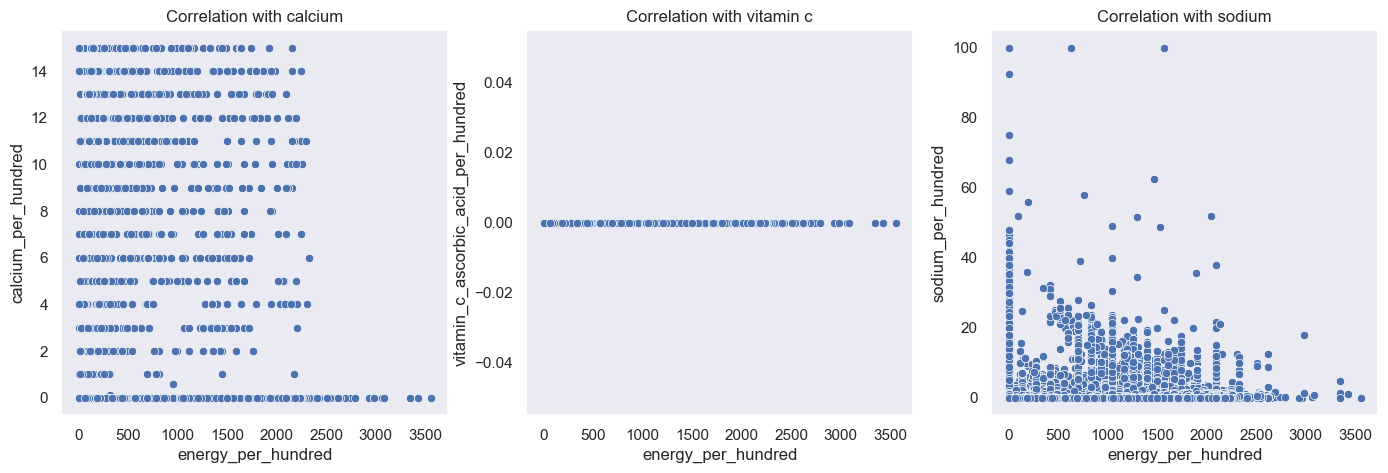

In [175]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="calcium_per_hundred", ax=axes[0], palette="light:m_r").set(title='Correlation with calcium')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="sodium_per_hundred", ax=axes[2], palette="light:m_r").set(title='Correlation with sodium')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="vitamin_c_ascorbic_acid_per_hundred", ax=axes[1], palette="light:m_r").set(title='Correlation with vitamin c')
plt.show()

There is no linear relationship with this variables.

##### __3.Testing the independaence of two categorical variables statistically__

We are going to test the independence of two categorical variables statistically.
For that we are going to use chi2 test.
We will use the "energy_per_hundred" column to create new variables containing categories low enery, medium energy and high energy.

In [176]:
df = df.dropna(subset=["energy_per_hundred"]).reset_index(drop=True)

In [177]:
df.sort_values(by='energy_per_hundred', ascending=False, inplace=True)

In [178]:
df["energy_per_hundred"].describe()

count    86718.000000
mean       898.428904
std        714.949555
min          0.000000
25%        175.730000
50%        882.820000
75%       1540.000000
max       3556.400000
Name: energy_per_hundred, dtype: float64

In [179]:
df['energy'] = df['energy_per_hundred'].apply(lambda x:  'low' if 0 < x < 670 else 'high' if 1600 <= x < 3557 else 'mid')

In [180]:
df[["energy","energy_per_hundred", "country"]]

energy  energy_per_hundred country
37140   high             3556.40      us
37139   high             3556.40      us
37138   high             3556.40      us
37141   high             3556.40      us
56310   high             3422.51      us
...      ...                 ...     ...
77186    mid                0.00      us
64980    mid                0.00      us
77188    mid                0.00      us
27771    mid                0.00      us
45632    mid                0.00      us

[86718 rows x 3 columns]

In [181]:
country = df["country"]
energy= df["energy"]

In this case we will be testing energy per hundred with countries. So when one variable increases the other  variable increases or decreases as well.
With this test minimum expected count should be at least one and there shouldn't be too many cells.

To get a quick look from the counts of both of these we can use pandas crosstable and simply enter those two fields.
Now to perform the test we will use chi2 contingency
which is from the stats module.
Let's load that in and then simply feed that cross table and then we are going to store 
all the results separately so we have the chi value the p value degrees of freedom and 
expectation expected values so that we get all of those as a result.


In [182]:
crosstable = pd.crosstab(country, energy)

In [183]:
crosstable

energy    high    low    mid
country                     
ch        2698   5383   4165
de          92    176    182
fr           3     15     12
it          29     41     33
uk           0      1      0
us       14799  20881  38208

In [184]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(crosstable, correction=False) 
c, p, dof, expected

(1575.814497415865,
 0.0,
 10,
 array([[2.48837342e+03, 3.74180980e+03, 6.01581679e+03],
        [9.14394935e+01, 1.37499135e+02, 2.21061371e+02],
        [6.09596624e+00, 9.16660901e+00, 1.47374248e+01],
        [2.09294841e+01, 3.14720243e+01, 5.05984917e+01],
        [2.03198875e-01, 3.05553634e-01, 4.91247492e-01],
        [1.50139584e+04, 2.25767469e+04, 3.62972947e+04]]))

The first value is the chi-square value of 1575.8 . The chance of such a value or even more extreme, in a sample, if there is no association is 0.0(the second value). This is known as the p-value or significance. It is considered 'significant' usually if this value is below 0.05, which in this case it is. 



The third value is the degrees of freedom, which is an indication of the size of the table.


There is a criteria that the lowest expected value should be at least 1, and not too many should be below 5. Often a threshold of 20% is used (so if more than 20% of the cells have an expected count of 5 or less, the test is not reliable to use).

So lets check this. First the lowest expected count:

In [185]:
expected.min()

0.2031988745127886

So 0.2 is not in the criteria of at least 1.

Now for the percentage of cells with a count less than 5:

In [186]:
len(expected[expected < 5]) / len(expected) * 100

50.0

This criteria is also not good. 